In [1]:
%run "C:/Users/ssiva/OneDrive/Documents/Machine_Learning/Machine_Learning/Machine_Learning_Algorithms/Machine_Learning_Algorithms.ipynb"

In [6]:
from bs4 import BeautifulSoup
import requests

In [2]:
pd.set_option('display.max_columns',50)
pd.set_option('display.max_rows',20)


In [3]:
plt.rcParams['figure.figsize'] = (14,10)

In [4]:
sns.set_style('darkgrid')

In [7]:
page = requests.get("https://www.worldometers.info/coronavirus/country/us/")

In [8]:
soup = BeautifulSoup(page.content,'html.parser')

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   United States Coronavirus: 2,727,853 Cases and 130,122 Deaths - Worldometer
  </title>
  <meta content="United States Coronavirus update with statistics and graphs: total and new cases, deaths per day, mortality and recovery rates, current active cases, recoveries, trends and timeline." name="description"/>
  <link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
  <link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/>
  <link href="/favicon/apple-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/>
 
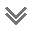

In [9]:
print(soup.prettify())

In [10]:
table = soup.find(id = "usa_table_countries_today")

In [20]:
print(table.prettify())

<table class="table table-bordered table-hover table-responsive usa_table_countries" id="usa_table_countries_today" style="width:100%">
 <thead>
  <tr>
   <th width="100">
    USA
    <br>
     State
    </br>
   </th>
   <th width="20">
    Total
    <br>
     Cases
    </br>
   </th>
   <th width="30">
    New
    <br/>
    Cases
   </th>
   <th width="30">
    Total
    <br/>
    Deaths
   </th>
   <th width="30">
    New
    <br/>
    Deaths
   </th>
   <th width="30">
    Active
    <br/>
    Cases
   </th>
   <th width="30">
    Tot Cases/
    <br/>
    1M pop
   </th>
   <th width="30">
    Deaths/
    <br/>
    1M pop
   </th>
   <th width="30">
    Total
    <br/>
    Tests
   </th>
   <th width="30">
    Tests/
    <br/>
    <nobr>
     1M pop
    </nobr>
   </th>
   <th width="30">
    Source
   </th>
   <th width="30">
    Projections
   </th>
  </tr>
 </thead>
 <tbody>
  <tr class="total_row_usa">
   <td style="text-align:left;">
    USA Total
   </td>
   <td>
    2,553,06

# Extracting Header Columns

In [11]:
header = table.find("thead").find("tr")

In [12]:
header_elements = table.find_all("th")

In [13]:
header_elements

[<th width="100">USA<br>State</br></th>,
 <th width="20">Total<br>Cases</br></th>,
 <th width="30">New<br/>Cases</th>,
 <th width="30">Total<br/>Deaths</th>,
 <th width="30">New<br/>Deaths</th>,
 <th width="30">Active<br/>Cases</th>,
 <th width="30">Tot Cases/<br/>1M pop</th>,
 <th width="30">Deaths/<br/>1M pop</th>,
 <th width="30">Total<br/>Tests</th>,
 <th width="30">Tests/<br/>
 <nobr>1M pop</nobr>
 </th>,
 <th width="30">Source</th>,
 <th width="30">Projections</th>]

In [14]:
col_names = [i.get_text() for i in header_elements]

In [15]:
col_names

['USAState',
 'TotalCases',
 'NewCases',
 'TotalDeaths',
 'NewDeaths',
 'ActiveCases',
 'Tot\xa0Cases/1M pop',
 'Deaths/1M pop',
 'TotalTests',
 'Tests/\n1M pop\n',
 'Source',
 'Projections']

In [16]:
col_names[6] = 'Tot Cases Per 1M Pop'
col_names[7] = 'Deaths Per 1M Pop'
col_names[9] = 'Tests Per 1M Pop'

# Extracting Table Values

In [17]:
table_data = table.find("tbody")

In [35]:
print(table_data.prettify())

<tbody>
 <tr class="total_row_usa">
  <td style="text-align:left;">
   USA Total
  </td>
  <td>
   2,596,537
  </td>
  <td>
  </td>
  <td>
   128,152
  </td>
  <td>
  </td>
  <td>
   1,386,948
  </td>
  <td>
   7,844
  </td>
  <td>
   387
  </td>
  <td>
   31,998,024
  </td>
  <td>
   96,670
  </td>
  <td>
  </td>
  <td>
  </td>
 </tr>
 <tr style="">
  <td style="font-weight: bold; font-size:15px; text-align:left;">
   <a class="mt_a" href="/coronavirus/usa/new-york/">
    New York
   </a>
  </td>
  <td style="font-weight: bold; text-align:right">
   416,018
  </td>
  <td style="font-weight: bold; text-align:right;">
  </td>
  <td style="font-weight: bold; text-align:right;">
   31,452
  </td>
  <td style="font-weight: bold; text-align:right;">
  </td>
  <td style="text-align:right;font-weight:bold;">
   295,908
  </td>
  <td style="font-weight: bold; text-align:right">
   21,385
  </td>
  <td style="font-weight: bold; text-align:right">
   1,617
  </td>
  <td style="text-align:right;f

In [18]:
table_rows = table_data.find_all("tr")

In [19]:
matrix_data = []

In [20]:
for row in table_rows:
    row_list = row.find_all("td")
    row_elements = [i.get_text() for i in row_list]
    matrix_data.append(row_elements)

In [21]:
matrix_data[0]

['USA Total',
 '2,727,853',
 '',
 '130,122',
 '',
 '1,454,397',
 '8,241',
 '393',
 '34,198,027',
 '103,316',
 '\xa0',
 '\xa0']

# Reading the data into a Pandas DataFrame

In [22]:
worldometers = pd.DataFrame(matrix_data,columns = col_names)

In [23]:
worldometers.head()

,USAState,TotalCases,NewCases,TotalDeaths,NewDeaths,ActiveCases,Tot Cases Per 1M Pop,Deaths Per 1M Pop,TotalTests,Tests Per 1M Pop,Source,Projections
0,USA Total,"2,727,853",,"130,122",,"1,454,397","8,241",393,"34,198,027","103,316",,
1,\nNew York,"417,836",\n,"\n32,129",,"\n296,232","21,479","1,652","\n3,914,938","201,245",\n[view by county] [1] [2] [3] [4],\n[projections]\n
2,\nCalifornia,"230,891",\n,"\n6,081",,"\n161,148","5,844",154,"\n4,168,509","105,499",\n[view by county] [1],\n[projections]\n
3,\nNew Jersey,"176,953",\n,"\n15,177",,"\n116,634","19,922","1,709","\n1,422,374","160,138",\n[view by county] [1],\n [projections]\n
4,\nTexas,"167,269",\n,"\n2,496",,"\n79,955","5,769",86,"\n2,119,036","73,081",\n[view by county] [1] [2],\n[projections]\n


In [24]:
worldometers.drop(['Source','Projections'],axis = 1,inplace = True)

In [25]:
worldometers.head()

,USAState,TotalCases,NewCases,TotalDeaths,NewDeaths,ActiveCases,Tot Cases Per 1M Pop,Deaths Per 1M Pop,TotalTests,Tests Per 1M Pop
0,USA Total,"2,727,853",,"130,122",,"1,454,397","8,241",393,"34,198,027","103,316"
1,\nNew York,"417,836",\n,"\n32,129",,"\n296,232","21,479","1,652","\n3,914,938","201,245"
2,\nCalifornia,"230,891",\n,"\n6,081",,"\n161,148","5,844",154,"\n4,168,509","105,499"
3,\nNew Jersey,"176,953",\n,"\n15,177",,"\n116,634","19,922","1,709","\n1,422,374","160,138"
4,\nTexas,"167,269",\n,"\n2,496",,"\n79,955","5,769",86,"\n2,119,036","73,081"


In [26]:
worldometers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 10 columns):
USAState                52 non-null object
TotalCases              52 non-null object
NewCases                52 non-null object
TotalDeaths             52 non-null object
NewDeaths               52 non-null object
ActiveCases             52 non-null object
Tot Cases Per 1M Pop    52 non-null object
Deaths Per 1M Pop       52 non-null object
TotalTests              52 non-null object
Tests Per 1M Pop        52 non-null object
dtypes: object(10)
memory usage: 4.1+ KB


In [27]:
worldometers.columns

Index(['USAState', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths',
       'ActiveCases', 'Tot Cases Per 1M Pop', 'Deaths Per 1M Pop',
       'TotalTests', 'Tests Per 1M Pop'],
      dtype='object')

### I noticed that due to how the data was entered, \n is showing up in some columns.  I will be treating for that now.

In [28]:
fix_columns = list(worldometers.columns)

In [29]:
for col in fix_columns:
    worldometers[col] = worldometers[col].apply(lambda val: val.split('\n')[-1])

In [30]:
worldometers

,USAState,TotalCases,NewCases,TotalDeaths,NewDeaths,ActiveCases,Tot Cases Per 1M Pop,Deaths Per 1M Pop,TotalTests,Tests Per 1M Pop
0,USA Total,"2,727,853",,"130,122",,"1,454,397","8,241",393,"34,198,027","103,316"
1,New York,"417,836",,"32,129",,"296,232","21,479","1,652","3,914,938","201,245"
2,California,"230,891",,"6,081",,"161,148","5,844",154,"4,168,509","105,499"
3,New Jersey,"176,953",,"15,177",,"116,634","19,922","1,709","1,422,374","160,138"
4,Texas,"167,269",,"2,496",,"79,955","5,769",86,"2,119,036","73,081"
5,Florida,"152,434",,"3,505",,"125,011","7,097",163,"1,946,510","90,629"
6,Illinois,"144,238",,"7,124",,"25,505","11,383",562,"1,604,018","126,581"
7,Massachusetts,"108,882",,"8,054",,"9,424","15,797","1,169","914,646","132,702"
8,Pennsylvania,"91,228",,"6,702",,"16,974","7,126",524,"775,037","60,540"
9,Georgia,"81,291",,"2,805",,"69,234","7,656",264,"991,501","93,384"


### Now that the data looks good, I am going to convert the string columns which should be numeric to integer columns

In [49]:
# for col in worldometers.columns.drop("USAState"):
#     worldometers[col] = worldometers[col].apply(lambda val: int(val))

### From the error above shows that some values were entered with commas to show thousands and millions place.  I will treat for that now

In [50]:
for col in worldometers.columns.drop('USAState'):
    worldometers[col] = worldometers[col].apply(lambda val: ''.join(val.split(',')))

In [51]:
worldometers.head(1)

,USAState,TotalCases,NewCases,TotalDeaths,NewDeaths,ActiveCases,Tot Cases Per 1M Pop,Deaths Per 1M Pop,TotalTests,Tests Per 1M Pop
0,USA Total,2596537,,128152,,1386948,7844,387,31998024,96670


### Now that the commas are remove, I can convert the string columns to integer columns

### I added the if else cause in the lambda function because the NewCases and NewDeaths columns were filled with '' and ' ' since it was a new day and no new cases or deaths were recorded

In [52]:
for col in worldometers.columns.drop("USAState"):
    worldometers[col] = worldometers[col].apply(lambda val: int(val) if val not in  ['',' '] else 0)

In [53]:
worldometers.head()

,USAState,TotalCases,NewCases,TotalDeaths,NewDeaths,ActiveCases,Tot Cases Per 1M Pop,Deaths Per 1M Pop,TotalTests,Tests Per 1M Pop
0,USA Total,2596537,0,128152,0,1386948,7844,387,31998024,96670
1,New York,416018,0,31452,0,295908,21385,1617,3754722,193009
2,California,210849,0,5904,0,147342,5336,149,3839711,97178
3,New Jersey,176045,0,15091,0,119658,19820,1699,1367250,153932
4,Texas,148845,0,2406,0,68191,5133,83,1959617,67583


In [54]:
worldometers.iloc[1:,:].sum()

USAState                New York California New Jersey Texas Illinois ...
TotalCases                                                        2537625
NewCases                                                                0
TotalDeaths                                                        125927
NewDeaths                                                               0
ActiveCases                                                       1365034
Tot Cases Per 1M Pop                                               354032
Deaths Per 1M Pop                                                   16466
TotalTests                                                       31593749
Tests Per 1M Pop                                                  4961796
dtype: object

### I noticed that the first state which looks at the US overall does not exactly match the sum of the 50 + 1 (DC) states.  this is because USATotal includes territories and other areas.  I am going to account for this.

In [55]:
to_sum_cols = worldometers.columns.drop(['USAState','Tot Cases Per 1M Pop','Deaths Per 1M Pop','Tests Per 1M Pop'])

In [56]:
to_sum_cols

Index(['TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'ActiveCases',
       'TotalTests'],
      dtype='object')

In [57]:
for col in to_sum_cols:
    worldometers.loc[0,col] = worldometers.loc[1:,col].sum()

In [58]:
worldometers

,USAState,TotalCases,NewCases,TotalDeaths,NewDeaths,ActiveCases,Tot Cases Per 1M Pop,Deaths Per 1M Pop,TotalTests,Tests Per 1M Pop
0,USA Total,2537625,0,125927,0,1365034,7844,387,31593749,96670
1,New York,416018,0,31452,0,295908,21385,1617,3754722,193009
2,California,210849,0,5904,0,147342,5336,149,3839711,97178
3,New Jersey,176045,0,15091,0,119658,19820,1699,1367250,153932
4,Texas,148845,0,2406,0,68191,5133,83,1959617,67583
5,Illinois,142130,0,7074,0,27379,11216,558,1522242,120128
6,Florida,132545,0,3392,0,106819,6171,158,1830791,85241
7,Massachusetts,108443,0,8041,0,8998,15733,1167,891101,129286
8,Pennsylvania,89488,0,6660,0,16209,6990,520,737074,57575
9,Georgia,74985,0,2776,0,64705,7062,261,942778,88795


In [59]:
corona = worldometers.loc[1:,:]

# EDA

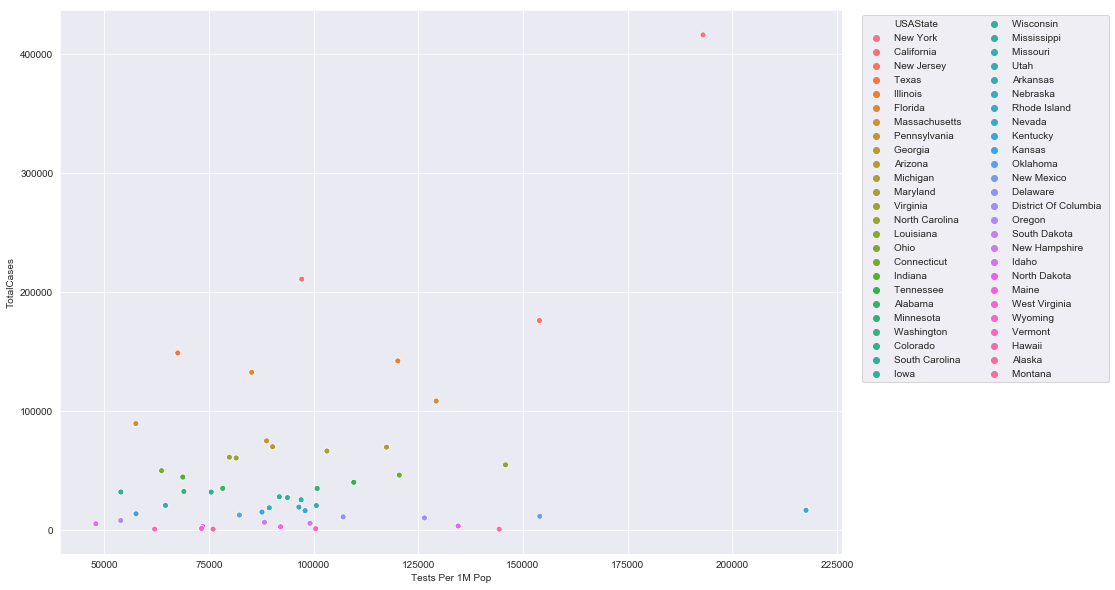

In [63]:
sns.scatterplot(data = corona,x = 'Tests Per 1M Pop',y = "TotalCases",hue = 'USAState')
plt.legend(bbox_to_anchor = (1.02,1),ncol = 2)

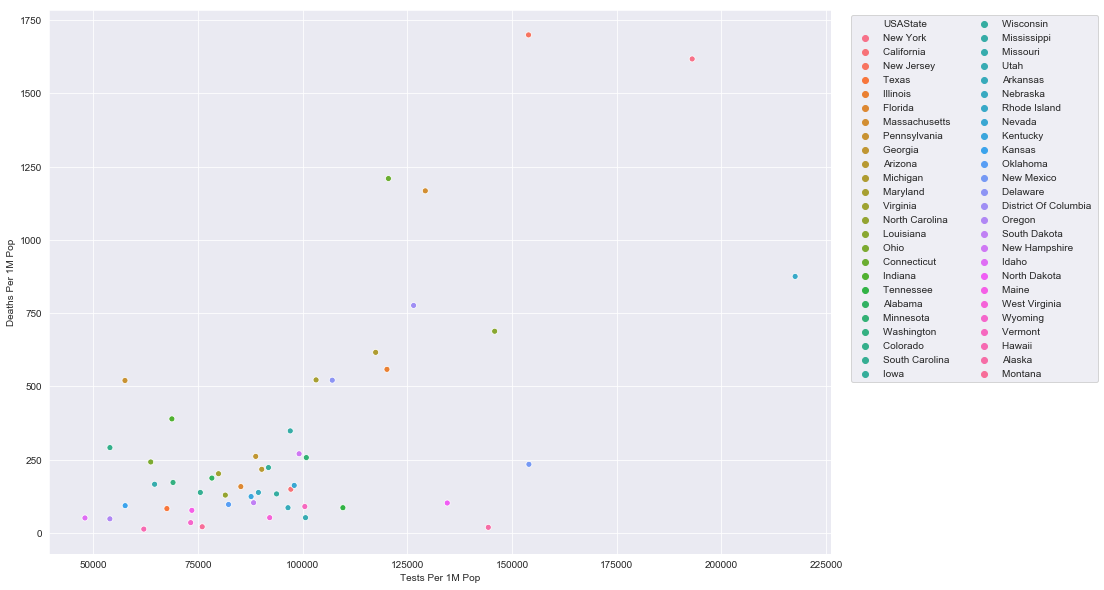

In [64]:
sns.scatterplot(data = corona,x = 'Tests Per 1M Pop', y = 'Deaths Per 1M Pop',hue = 'USAState')
plt.legend(bbox_to_anchor = (1.02,1),ncol = 2)

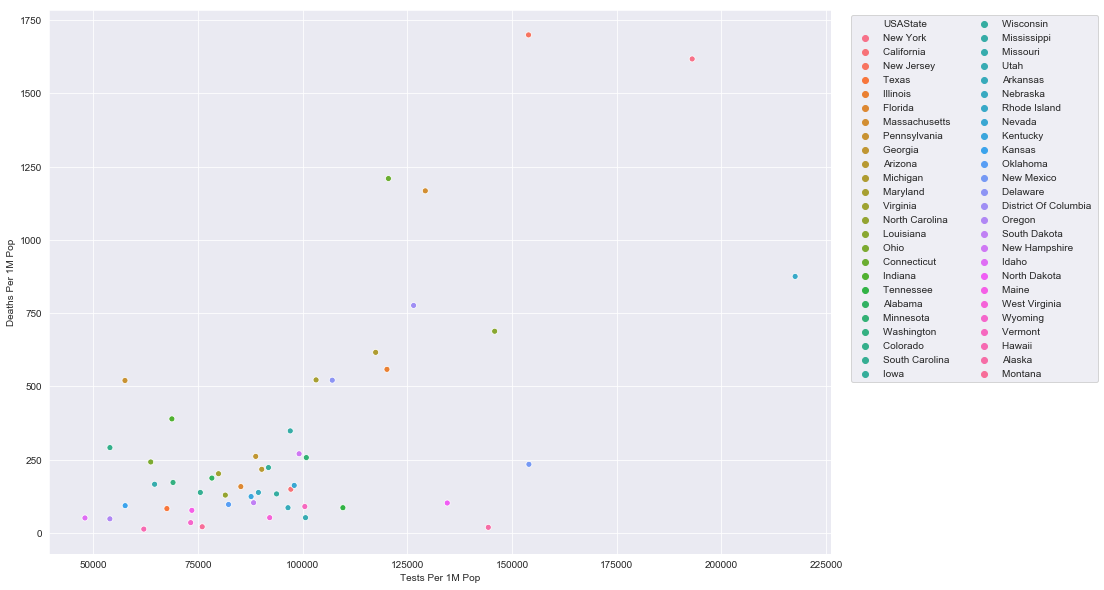

In [65]:
sns.scatterplot(data = corona,x = 'Tests Per 1M Pop', y= "Deaths Per 1M Pop",hue = 'USAState')
plt.legend(bbox_to_anchor = (1.02,1),ncol = 2)

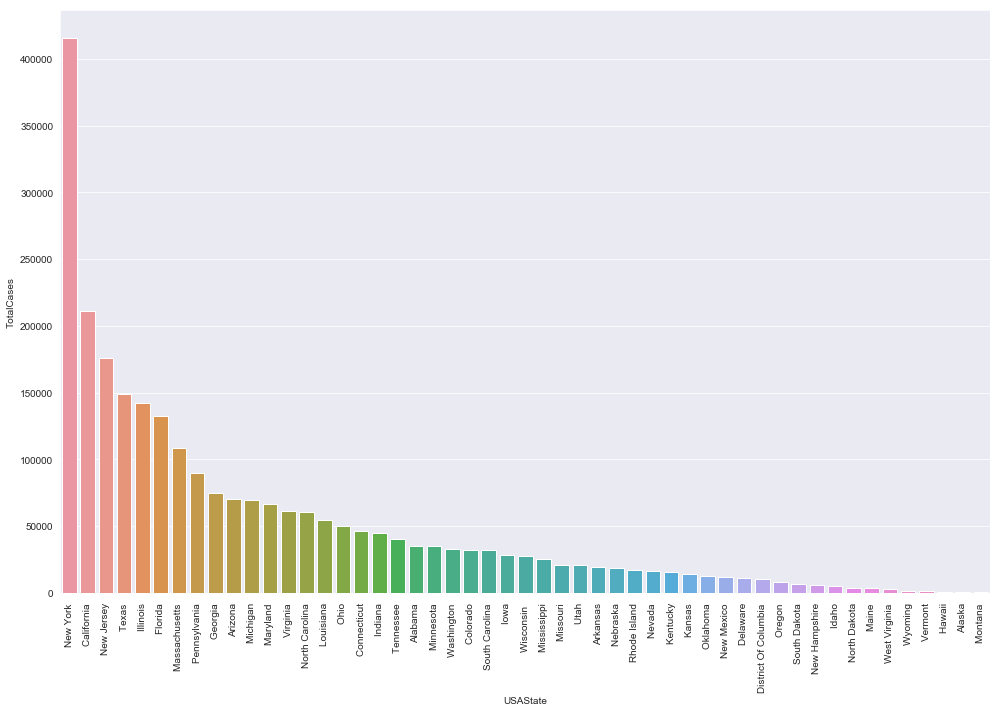

In [66]:
sns.barplot(data = corona,x = 'USAState',y = 'TotalCases')
plt.xticks(rotation = 90)
plt.tight_layout()

# Further EDA

### Now I am going to read in a file with state demographics

In [67]:
state_demo = pd.read_csv(r'C:\Users\ssiva\OneDrive\Documents\Machine Learning_\Machine Learning\US_States_Data\us_county_sociohealth_data.csv')

In [68]:
state_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3144 entries, 0 to 3143
Columns: 181 entries, fips to percentile_rank_social_vulnerability
dtypes: float64(147), int64(30), object(4)
memory usage: 4.3+ MB


In [69]:
state_demo.describe()

,lat,lon,total_population,area_sqmi,population_density_per_sqmi,num_deaths,years_of_potential_life_lost_rate,percent_fair_or_poor_health,average_number_of_physically_unhealthy_days,average_number_of_mentally_unhealthy_days,percent_low_birthweight,percent_smokers,percent_adults_with_obesity,food_environment_index,percent_physically_inactive,percent_with_access_to_exercise_opportunities,percent_excessive_drinking,num_alcohol_impaired_driving_deaths,num_driving_deaths,percent_driving_deaths_with_alcohol_involvement,num_chlamydia_cases,chlamydia_rate,teen_birth_rate,num_uninsured,percent_uninsured,...,percent_multi_unit_housing,percent_mobile_homes,percent_overcrowding,percent_no_vehicle,percent_institutionalized_in_group_quarters,percentile_rank_below_poverty,percentile_rank_unemployed,percentile_rank_per_capita_income,percentile_rank_no_highschool_diploma,percentile_rank_socioeconomic_theme,percentile_rank_age_65_and_older,percentile_rank_age_17_and_younger,percentile_rank_disabled,percentile_rank_single_parent_households,percentile_rank_household_comp_disability_theme,percentile_rank_minorities,percentile_rank_limited_english_abilities,percentile_rank_minority_status_and_language_theme,percentile_rank_multi_unit_housing,percentile_rank_mobile_homes,percentile_rank_overcrowding,percentile_rank_no_vehicle,percentile_rank_institutionalized_in_group_quarters,percentile_rank_housing_and_transportation,percentile_rank_social_vulnerability
count,3144.000000,3144.000000,3.144000e+03,3144.000000,3144.000000,2851.000000,2851.000000,3144.000000,3144.000000,3144.000000,3037.000000,3144.000000,3144.000000,3125.000000,3144.000000,3138.000000,3144.000000,3109.000000,3109.000000,3109.000000,2992.000000,2992.000000,2989.000000,3143.000000,3143.000000,...,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000
mean,38.457313,-92.280536,1.043681e+05,1124.200881,276.839299,1363.905998,8581.299586,17.935375,3.990334,4.167264,8.140924,17.468421,32.853657,7.451629,27.365692,62.834015,17.513798,16.196526,58.485365,28.325433,593.586230,401.280387,29.877944,8948.394846,11.476161,...,4.629448,12.983354,2.419351,6.554915,3.546195,0.497665,0.495163,0.499878,0.497565,0.499962,0.496368,0.500056,0.496486,0.500114,0.499871,0.500198,0.499105,0.500181,0.499996,0.497943,0.500021,0.494548,0.499785,0.500085,0.500037
std,5.307184,12.921097,3.581135e+05,3611.454730,1864.419086,3605.025873,2604.859173,4.739056,0.704652,0.602526,2.039656,3.609522,5.453932,1.145124,5.695856,23.372086,3.148348,37.451440,135.583655,15.018175,2549.520469,283.043120,14.206579,35943.904526,5.143456,...,5.639319,9.535382,2.416937,4.588769,4.655000,0.289098,0.289206,0.288792,0.289402,0.288751,0.289084,0.288757,0.289211,0.288763,0.288772,0.288847,0.290705,0.288864,0.289413,0.289575,0.288998,0.289877,0.288986,0.288816,0.288755
min,19.598724,-166.890423,7.600000e+01,2.050706,0.038490,32.000000,2730.603992,8.120645,2.449054,2.532818,2.891156,5.908719,12.400000,0.000000,9.500000,0.000000,7.809632,0.000000,1.000000,0.000000,4.000000,35.800000,2.109069,27.000000,2.262724,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.703544,-98.223328,1.099750e+04,430.728099,16.802899,226.000000,6792.558649,14.321162,3.471602,3.748762,6.770833,14.939163,29.200000,6.900000,23.500000,48.519960,15.295852,3.000000,13.000000,19.607843,35.000000,227.200000,19.188612,889.000000,7.395900,...,1.400000,5.400000,1.200000,4.400000,1.200000,0.245500,0.246875,0.249825,0.247700,0.250125,0.246700,0.250125,0.249600,0.250125,0.249825,0.250125,0.250125,0.250125,0.250125,0.245500,0.250125,0.249600,0.250125,0.250

In [60]:
state_demo.head()

,fips,state,county,lat,lon,total_population,area_sqmi,population_density_per_sqmi,num_deaths,years_of_potential_life_lost_rate,percent_fair_or_poor_health,average_number_of_physically_unhealthy_days,average_number_of_mentally_unhealthy_days,percent_low_birthweight,percent_smokers,percent_adults_with_obesity,food_environment_index,percent_physically_inactive,percent_with_access_to_exercise_opportunities,percent_excessive_drinking,num_alcohol_impaired_driving_deaths,num_driving_deaths,percent_driving_deaths_with_alcohol_involvement,num_chlamydia_cases,chlamydia_rate,teen_birth_rate,num_uninsured,percent_uninsured,num_primary_care_physicians,primary_care_physicians_rate,num_dentists,dentist_rate,num_mental_health_providers,mental_health_provider_rate,preventable_hospitalization_rate,percent_with_annual_mammogram,percent_vaccinated,high_school_graduation_rate,num_some_college,population,percent_some_college,num_unemployed_CHR,labor_force,percent_unemployed_CHR,percent_children_in_poverty,eightieth_percentile_income,twentieth_percentile_income,income_ratio,num_single_parent_households_CHR,num_households_CHR,percent_single_parent_households_CHR,num_associations,social_association_rate,annual_average_violent_crimes,violent_crime_rate,num_injury_deaths,injury_death_rate,average_daily_pm2_5,presence_of_water_violation,percent_severe_housing_problems,severe_housing_cost_burden,overcrowding,inadequate_facilities,percent_drive_alone_to_work,num_workers_who_drive_alone,percent_long_commute_drives_alone,life_expectancy,num_deaths_2,age_adjusted_death_rate,num_deaths_3,child_mortality_rate,num_deaths_4,infant_mortality_rate,percent_frequent_physical_distress,percent_frequent_mental_distress,percent_adults_with_diabetes,num_hiv_cases,hiv_prevalence_rate,num_food_insecure,percent_food_insecure,num_limited_access,percent_limited_access_to_healthy_foods,num_drug_overdose_deaths,drug_overdose_mortality_rate,num_motor_vehicle_deaths,motor_vehicle_mortality_rate,percent_insufficient_sleep,num_uninsured_2,percent_uninsured_2,num_uninsured_3,percent_uninsured_3,other_primary_care_provider_rate,percent_disconnected_youth,average_grade_performance,average_grade_performance_2,median_household_income,percent_enrolled_in_free_or_reduced_lunch,segregation_index,segregation_index_2,homicide_rate,num_deaths_5,suicide_rate_age_adjusted,num_firearm_fatalities,firearm_fatalities_rate,juvenile_arrest_rate,average_traffic_volume_per_meter_of_major_roadways,num_homeowners,percent_homeowners,num_households_with_severe_cost_burden,percent_severe_housing_cost_burden,population_2,percent_less_than_18_years_of_age,percent_65_and_over,num_black,percent_black,num_american_indian_alaska_native,percent_american_indian_alaska_native,num_asian,percent_asian,num_native_hawaiian_other_pacific_islander,percent_native_hawaiian_other_pacific_islander,num_hispanic,percent_hispanic,num_non_hispanic_white,percent_non_hispanic_white,num_not_proficient_in_english,percent_not_proficient_in_english,percent_female,num_rural,percent_rural,num_housing_units,num_households_CDC,num_below_poverty,num_unemployed_CDC,per_capita_income,num_no_highschool_diploma,num_age_65_and_older,num_age_17_and_younger,num_disabled,num_single_parent_households_CDC,num_minorities,num_limited_english_abilities,num_multi_unit_housing,num_mobile_homes,num_overcrowding,num_households_with_no_vehicle,num_institutionalized_in_group_quarters,percent_below_poverty,percent_unemployed_CDC,percent_no_highschool_diploma,percent_age_65_and_older,percent_age_17_and_younger,percent_disabled,percent_single_parent_households_CDC,percent_minorities,percent_limited_english_abilities,percent_multi_unit_housing,percent_mobile_homes,percent_overcrowding,percent_no_vehicle,percent_institutionalized_in_group_quarters,percentile_rank_below_poverty,percentile_rank_unemployed,percentile_rank_per_capita_income,percentile_rank_no_highschool_diploma,percentile_rank_socioeconomic_theme,percentile_rank_age_65_and_older,percentile_rank_age_17_

In [70]:
democols = list(state_demo.columns)

In [71]:
democols

['fips',
 'state',
 'county',
 'lat',
 'lon',
 'total_population',
 'area_sqmi',
 'population_density_per_sqmi',
 'num_deaths',
 'years_of_potential_life_lost_rate',
 'percent_fair_or_poor_health',
 'average_number_of_physically_unhealthy_days',
 'average_number_of_mentally_unhealthy_days',
 'percent_low_birthweight',
 'percent_smokers',
 'percent_adults_with_obesity',
 'food_environment_index',
 'percent_physically_inactive',
 'percent_with_access_to_exercise_opportunities',
 'percent_excessive_drinking',
 'num_alcohol_impaired_driving_deaths',
 'num_driving_deaths',
 'percent_driving_deaths_with_alcohol_involvement',
 'num_chlamydia_cases',
 'chlamydia_rate',
 'teen_birth_rate',
 'num_uninsured',
 'percent_uninsured',
 'num_primary_care_physicians',
 'primary_care_physicians_rate',
 'num_dentists',
 'dentist_rate',
 'num_mental_health_providers',
 'mental_health_provider_rate',
 'preventable_hospitalization_rate',
 'percent_with_annual_mammogram',
 'percent_vaccinated',
 'high_school

In [72]:
stateslist = list(state_demo['state'].value_counts().index)

In [73]:
len(stateslist)

51

# Treating State Demographics Table

In [65]:
state_demo.head(3)

,fips,state,county,lat,lon,total_population,area_sqmi,population_density_per_sqmi,num_deaths,years_of_potential_life_lost_rate,percent_fair_or_poor_health,average_number_of_physically_unhealthy_days,average_number_of_mentally_unhealthy_days,percent_low_birthweight,percent_smokers,percent_adults_with_obesity,food_environment_index,percent_physically_inactive,percent_with_access_to_exercise_opportunities,percent_excessive_drinking,num_alcohol_impaired_driving_deaths,num_driving_deaths,percent_driving_deaths_with_alcohol_involvement,num_chlamydia_cases,chlamydia_rate,teen_birth_rate,num_uninsured,percent_uninsured,num_primary_care_physicians,primary_care_physicians_rate,num_dentists,dentist_rate,num_mental_health_providers,mental_health_provider_rate,preventable_hospitalization_rate,percent_with_annual_mammogram,percent_vaccinated,high_school_graduation_rate,num_some_college,population,percent_some_college,num_unemployed_CHR,labor_force,percent_unemployed_CHR,percent_children_in_poverty,eightieth_percentile_income,twentieth_percentile_income,income_ratio,num_single_parent_households_CHR,num_households_CHR,percent_single_parent_households_CHR,num_associations,social_association_rate,annual_average_violent_crimes,violent_crime_rate,num_injury_deaths,injury_death_rate,average_daily_pm2_5,presence_of_water_violation,percent_severe_housing_problems,severe_housing_cost_burden,overcrowding,inadequate_facilities,percent_drive_alone_to_work,num_workers_who_drive_alone,percent_long_commute_drives_alone,life_expectancy,num_deaths_2,age_adjusted_death_rate,num_deaths_3,child_mortality_rate,num_deaths_4,infant_mortality_rate,percent_frequent_physical_distress,percent_frequent_mental_distress,percent_adults_with_diabetes,num_hiv_cases,hiv_prevalence_rate,num_food_insecure,percent_food_insecure,num_limited_access,percent_limited_access_to_healthy_foods,num_drug_overdose_deaths,drug_overdose_mortality_rate,num_motor_vehicle_deaths,motor_vehicle_mortality_rate,percent_insufficient_sleep,num_uninsured_2,percent_uninsured_2,num_uninsured_3,percent_uninsured_3,other_primary_care_provider_rate,percent_disconnected_youth,average_grade_performance,average_grade_performance_2,median_household_income,percent_enrolled_in_free_or_reduced_lunch,segregation_index,segregation_index_2,homicide_rate,num_deaths_5,suicide_rate_age_adjusted,num_firearm_fatalities,firearm_fatalities_rate,juvenile_arrest_rate,average_traffic_volume_per_meter_of_major_roadways,num_homeowners,percent_homeowners,num_households_with_severe_cost_burden,percent_severe_housing_cost_burden,population_2,percent_less_than_18_years_of_age,percent_65_and_over,num_black,percent_black,num_american_indian_alaska_native,percent_american_indian_alaska_native,num_asian,percent_asian,num_native_hawaiian_other_pacific_islander,percent_native_hawaiian_other_pacific_islander,num_hispanic,percent_hispanic,num_non_hispanic_white,percent_non_hispanic_white,num_not_proficient_in_english,percent_not_proficient_in_english,percent_female,num_rural,percent_rural,num_housing_units,num_households_CDC,num_below_poverty,num_unemployed_CDC,per_capita_income,num_no_highschool_diploma,num_age_65_and_older,num_age_17_and_younger,num_disabled,num_single_parent_households_CDC,num_minorities,num_limited_english_abilities,num_multi_unit_housing,num_mobile_homes,num_overcrowding,num_households_with_no_vehicle,num_institutionalized_in_group_quarters,percent_below_poverty,percent_unemployed_CDC,percent_no_highschool_diploma,percent_age_65_and_older,percent_age_17_and_younger,percent_disabled,percent_single_parent_households_CDC,percent_minorities,percent_limited_english_abilities,percent_multi_unit_housing,percent_mobile_homes,percent_overcrowding,percent_no_vehicle,percent_institutionalized_in_group_quarters,percentile_rank_below_poverty,percentile_rank_unemployed,percentile_rank_per_capita_income,percentile_rank_no_highschool_diploma,percentile_rank_socioeconomic_theme,percentile_rank_age_65_and_older,percentile_rank_age_17_

In [66]:
state_demo[['total_population','population']].head()

,total_population,population
0,55049,14438
1,199510,48703
2,26614,6779
3,22572,5970
4,57704,13939


### First I need to aggregate the county data to state level.  The obstacle is that some columns need to be aggregated by summing and others by taking the mean.  First, for each county, I will find the percentage of the population the county has relative to the state the county belongs to.  Then, I will separate columns based on which of these two groups they belong to: sum counties or weighted mean counties.

In [67]:
state_demo.groupby('state').sum()['total_population']['Alabama']

4841164

In [74]:
def find_county_pop_ratio(cols):
    state,tot_pop = cols
    df = state_demo
    grouped = df.groupby('state').sum()['total_population']
    ratio = tot_pop/grouped[state]
    return ratio


In [75]:
state_demo['county_state_pop_ratio'] = state_demo[['state','total_population']].apply(find_county_pop_ratio,axis = 1)

### Now I am checking whether the population ratios were properly applied so that I can then use them as weights when I aggregate after grouping by the state

In [76]:
state_demo[state_demo['state'] == 'Alabama'].sum()['county_state_pop_ratio']

0.9999999999999998

In [77]:
state_demo[state_demo['state'] == 'Alabama'][['county','county_state_pop_ratio']].loc[0]

county                     Autauga
county_state_pop_ratio    0.011371
Name: 0, dtype: object

In [78]:
state_demo[state_demo['county'] == 'Autauga']['total_population'][0] / state_demo[state_demo['state'] == 'Alabama'].sum()['total_population']

0.011371025645898383

#### Everything seems to have worked fine

### Now I will separate the columns based on whether they need to be summed or averaged

In [79]:
state_demo.drop('fips',axis = 1, inplace = True)

In [80]:
# I will drop the population_density_per_sqmi since it can be calculated after grouping by state
state_demo.drop("population_density_per_sqmi",axis = 1,inplace = True)

In [81]:
democols = list(state_demo.columns)

In [82]:
democols

['state',
 'county',
 'lat',
 'lon',
 'total_population',
 'area_sqmi',
 'num_deaths',
 'years_of_potential_life_lost_rate',
 'percent_fair_or_poor_health',
 'average_number_of_physically_unhealthy_days',
 'average_number_of_mentally_unhealthy_days',
 'percent_low_birthweight',
 'percent_smokers',
 'percent_adults_with_obesity',
 'food_environment_index',
 'percent_physically_inactive',
 'percent_with_access_to_exercise_opportunities',
 'percent_excessive_drinking',
 'num_alcohol_impaired_driving_deaths',
 'num_driving_deaths',
 'percent_driving_deaths_with_alcohol_involvement',
 'num_chlamydia_cases',
 'chlamydia_rate',
 'teen_birth_rate',
 'num_uninsured',
 'percent_uninsured',
 'num_primary_care_physicians',
 'primary_care_physicians_rate',
 'num_dentists',
 'dentist_rate',
 'num_mental_health_providers',
 'mental_health_provider_rate',
 'preventable_hospitalization_rate',
 'percent_with_annual_mammogram',
 'percent_vaccinated',
 'high_school_graduation_rate',
 'num_some_college',
 

In [83]:
state_demo.head(1)

,state,county,lat,lon,total_population,area_sqmi,num_deaths,years_of_potential_life_lost_rate,percent_fair_or_poor_health,average_number_of_physically_unhealthy_days,average_number_of_mentally_unhealthy_days,percent_low_birthweight,percent_smokers,percent_adults_with_obesity,food_environment_index,percent_physically_inactive,percent_with_access_to_exercise_opportunities,percent_excessive_drinking,num_alcohol_impaired_driving_deaths,num_driving_deaths,percent_driving_deaths_with_alcohol_involvement,num_chlamydia_cases,chlamydia_rate,teen_birth_rate,num_uninsured,...,percent_mobile_homes,percent_overcrowding,percent_no_vehicle,percent_institutionalized_in_group_quarters,percentile_rank_below_poverty,percentile_rank_unemployed,percentile_rank_per_capita_income,percentile_rank_no_highschool_diploma,percentile_rank_socioeconomic_theme,percentile_rank_age_65_and_older,percentile_rank_age_17_and_younger,percentile_rank_disabled,percentile_rank_single_parent_households,percentile_rank_household_comp_disability_theme,percentile_rank_minorities,percentile_rank_limited_english_abilities,percentile_rank_minority_status_and_language_theme,percentile_rank_multi_unit_housing,percentile_rank_mobile_homes,percentile_rank_overcrowding,percentile_rank_no_vehicle,percentile_rank_institutionalized_in_group_quarters,percentile_rank_housing_and_transportation,percentile_rank_social_vulnerability,county_state_pop_ratio
0,Alabama,Autauga,32.534928,-86.642748,55049,594.44612,791.0,8128.59119,20.882987,4.743889,4.654031,8.619529,18.081557,33.3,7.2,34.7,69.130124,15.026031,15.0,56.0,26.785714,226.0,407.2,25.284927,4093.0,...,18.0,1.2,4.9,0.9,0.2824,0.3298,0.3607,0.4744,0.3298,0.1964,0.8313,0.738,0.32,0.5568,0.6339,0.5355,0.5976,0.6791,0.7268,0.2477,0.3298,0.1251,0.2881,0.3773,0.011371


In [84]:
neither_cols = ['state','county','county_state_pop_ratio']

In [85]:
sum_cols = ['total_population','area_sqmi','num_deaths','num_alcohol_impaired_driving_deaths','num_driving_deaths','num_chlamydia_cases',
            'num_uninsured','num_primary_care_physicians','num_dentists','num_mental_health_providers','num_some_college',
           'population','num_unemployed_CHR','labor_force','num_single_parent_households_CHR','num_households_CHR',
            'num_associations','num_injury_deaths','num_workers_who_drive_alone','num_deaths_2','num_deaths_3','num_deaths_4',
            'num_hiv_cases','num_food_insecure','num_limited_access','num_drug_overdose_deaths','num_motor_vehicle_deaths',
            'num_uninsured_2','num_uninsured_3','num_deaths_5','num_homeowners','num_households_with_severe_cost_burden',
            'population_2','num_black','num_american_indian_alaska_native','num_asian','num_native_hawaiian_other_pacific_islander',
           'num_hispanic','num_non_hispanic_white','num_not_proficient_in_english','num_rural','num_housing_units',
            'num_households_CDC','num_below_poverty','num_unemployed_CDC','num_no_highschool_diploma','num_age_65_and_older',
           'num_age_17_and_younger','num_disabled','num_single_parent_households_CDC','num_minorities','num_limited_english_abilities',
           'num_multi_unit_housing','num_mobile_homes','num_overcrowding','num_households_with_no_vehicle','num_institutionalized_in_group_quarters']

In [86]:
[i for i in sum_cols if i not in democols]

[]

In [87]:
mean_cols = [col for col in democols if col not in neither_cols and col not in sum_cols]

In [61]:
mean_cols

['lat',
 'lon',
 'years_of_potential_life_lost_rate',
 'percent_fair_or_poor_health',
 'average_number_of_physically_unhealthy_days',
 'average_number_of_mentally_unhealthy_days',
 'percent_low_birthweight',
 'percent_smokers',
 'percent_adults_with_obesity',
 'food_environment_index',
 'percent_physically_inactive',
 'percent_with_access_to_exercise_opportunities',
 'percent_excessive_drinking',
 'percent_driving_deaths_with_alcohol_involvement',
 'chlamydia_rate',
 'teen_birth_rate',
 'percent_uninsured',
 'primary_care_physicians_rate',
 'dentist_rate',
 'mental_health_provider_rate',
 'preventable_hospitalization_rate',
 'percent_with_annual_mammogram',
 'percent_vaccinated',
 'high_school_graduation_rate',
 'percent_some_college',
 'percent_unemployed_CHR',
 'percent_children_in_poverty',
 'eightieth_percentile_income',
 'twentieth_percentile_income',
 'income_ratio',
 'percent_single_parent_households_CHR',
 'social_association_rate',
 'annual_average_violent_crimes',
 'violent_c

### Now I will create 2 separate dataframes that contain the 2 separate column types (summation vs averaging)

In [88]:
mean_df = state_demo[neither_cols + mean_cols]

In [89]:
sum_df = state_demo[neither_cols + sum_cols]

In [90]:
mean_df.head(1)

,state,county,county_state_pop_ratio,lat,lon,years_of_potential_life_lost_rate,percent_fair_or_poor_health,average_number_of_physically_unhealthy_days,average_number_of_mentally_unhealthy_days,percent_low_birthweight,percent_smokers,percent_adults_with_obesity,food_environment_index,percent_physically_inactive,percent_with_access_to_exercise_opportunities,percent_excessive_drinking,percent_driving_deaths_with_alcohol_involvement,chlamydia_rate,teen_birth_rate,percent_uninsured,primary_care_physicians_rate,dentist_rate,mental_health_provider_rate,preventable_hospitalization_rate,percent_with_annual_mammogram,...,percent_multi_unit_housing,percent_mobile_homes,percent_overcrowding,percent_no_vehicle,percent_institutionalized_in_group_quarters,percentile_rank_below_poverty,percentile_rank_unemployed,percentile_rank_per_capita_income,percentile_rank_no_highschool_diploma,percentile_rank_socioeconomic_theme,percentile_rank_age_65_and_older,percentile_rank_age_17_and_younger,percentile_rank_disabled,percentile_rank_single_parent_households,percentile_rank_household_comp_disability_theme,percentile_rank_minorities,percentile_rank_limited_english_abilities,percentile_rank_minority_status_and_language_theme,percentile_rank_multi_unit_housing,percentile_rank_mobile_homes,percentile_rank_overcrowding,percentile_rank_no_vehicle,percentile_rank_institutionalized_in_group_quarters,percentile_rank_housing_and_transportation,percentile_rank_social_vulnerability
0,Alabama,Autauga,0.011371,32.534928,-86.642748,8128.59119,20.882987,4.743889,4.654031,8.619529,18.081557,33.3,7.2,34.7,69.130124,15.026031,26.785714,407.2,25.284927,8.721686,45.0418,32.37352,23.38087,7108.0,41.0,...,4.6,18.0,1.2,4.9,0.9,0.2824,0.3298,0.3607,0.4744,0.3298,0.1964,0.8313,0.738,0.32,0.5568,0.6339,0.5355,0.5976,0.6791,0.7268,0.2477,0.3298,0.1251,0.2881,0.3773


In [91]:
sum_df.head(1)

,state,county,county_state_pop_ratio,total_population,area_sqmi,num_deaths,num_alcohol_impaired_driving_deaths,num_driving_deaths,num_chlamydia_cases,num_uninsured,num_primary_care_physicians,num_dentists,num_mental_health_providers,num_some_college,population,num_unemployed_CHR,labor_force,num_single_parent_households_CHR,num_households_CHR,num_associations,num_injury_deaths,num_workers_who_drive_alone,num_deaths_2,num_deaths_3,num_deaths_4,...,population_2,num_black,num_american_indian_alaska_native,num_asian,num_native_hawaiian_other_pacific_islander,num_hispanic,num_non_hispanic_white,num_not_proficient_in_english,num_rural,num_housing_units,num_households_CDC,num_below_poverty,num_unemployed_CDC,num_no_highschool_diploma,num_age_65_and_older,num_age_17_and_younger,num_disabled,num_single_parent_households_CDC,num_minorities,num_limited_english_abilities,num_multi_unit_housing,num_mobile_homes,num_overcrowding,num_households_with_no_vehicle,num_institutionalized_in_group_quarters
0,Alabama,Autauga,0.011371,55049,594.44612,791.0,15.0,56.0,226.0,4093.0,25.0,18.0,13.0,8953,14438,942.0,25957.0,3495.0,13318.0,67,190.0,24428.0,791.0,30.0,35.0,...,55601,10755,267,681,62,1649,41316,426,22921.0,22714,20800,6697,1437,4528,7695,13853,10009,1516,13386,432,1034,4095,254,1024,490


### Now I will groupby the state column for both but use sum for one df and mean for the other

#### Grouping by state for sum_df

In [92]:
sum_grouped_df = sum_df.groupby('state').sum()

In [93]:
sum_grouped_df.head(1)

,county_state_pop_ratio,total_population,area_sqmi,num_deaths,num_alcohol_impaired_driving_deaths,num_driving_deaths,num_chlamydia_cases,num_uninsured,num_primary_care_physicians,num_dentists,num_mental_health_providers,num_some_college,population,num_unemployed_CHR,labor_force,num_single_parent_households_CHR,num_households_CHR,num_associations,num_injury_deaths,num_workers_who_drive_alone,num_deaths_2,num_deaths_3,num_deaths_4,num_hiv_cases,num_food_insecure,...,population_2,num_black,num_american_indian_alaska_native,num_asian,num_native_hawaiian_other_pacific_islander,num_hispanic,num_non_hispanic_white,num_not_proficient_in_english,num_rural,num_housing_units,num_households_CDC,num_below_poverty,num_unemployed_CDC,num_no_highschool_diploma,num_age_65_and_older,num_age_17_and_younger,num_disabled,num_single_parent_households_CDC,num_minorities,num_limited_english_abilities,num_multi_unit_housing,num_mobile_homes,num_overcrowding,num_households_with_no_vehicle,num_institutionalized_in_group_quarters
state,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Alabama,1.0,4841164,50646.423651,81791.0,1284.0,4654.0,29935.0,438049.0,3160.0,2355.0,4945.0,744300,1232042,86493.0,2198844.0,406913.0,1089671.0,5827,20015.0,2051445.0,81791.0,2986.0,3087.0,12496.0,765910,...,4887871,1295175,34375,73167,5207,217181,3197324,48517,1957932.0,2209335,1851061,868666,184479,496036,742394,1105189,777592,178209,1636829,51759,155936,295722,31333,119374,118341


#### Grouping by state for mean_df is more complicated.  First, I will have to apply a function that multiplies every value by the 'county_state_pop_ratio'. Then, I need to sum the grouped by state df like I did for the sum_df

In [94]:
def scale_by_pop_ratio(cols):
    ratio,feature = cols
    return ratio * feature

In [95]:
for col in mean_cols:
    mean_df[col] = mean_df[['county_state_pop_ratio',col]].apply(scale_by_pop_ratio,axis = 1)

C:\Users\ssiva\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [96]:
mean_df.head(1)

,state,county,county_state_pop_ratio,lat,lon,years_of_potential_life_lost_rate,percent_fair_or_poor_health,average_number_of_physically_unhealthy_days,average_number_of_mentally_unhealthy_days,percent_low_birthweight,percent_smokers,percent_adults_with_obesity,food_environment_index,percent_physically_inactive,percent_with_access_to_exercise_opportunities,percent_excessive_drinking,percent_driving_deaths_with_alcohol_involvement,chlamydia_rate,teen_birth_rate,percent_uninsured,primary_care_physicians_rate,dentist_rate,mental_health_provider_rate,preventable_hospitalization_rate,percent_with_annual_mammogram,...,percent_multi_unit_housing,percent_mobile_homes,percent_overcrowding,percent_no_vehicle,percent_institutionalized_in_group_quarters,percentile_rank_below_poverty,percentile_rank_unemployed,percentile_rank_per_capita_income,percentile_rank_no_highschool_diploma,percentile_rank_socioeconomic_theme,percentile_rank_age_65_and_older,percentile_rank_age_17_and_younger,percentile_rank_disabled,percentile_rank_single_parent_households,percentile_rank_household_comp_disability_theme,percentile_rank_minorities,percentile_rank_limited_english_abilities,percentile_rank_minority_status_and_language_theme,percentile_rank_multi_unit_housing,percentile_rank_mobile_homes,percentile_rank_overcrowding,percentile_rank_no_vehicle,percentile_rank_institutionalized_in_group_quarters,percentile_rank_housing_and_transportation,percentile_rank_social_vulnerability
0,Alabama,Autauga,0.011371,0.369956,-0.985217,92.430419,0.237461,0.053943,0.052921,0.098013,0.205606,0.378655,0.081871,0.394575,0.78608,0.170861,0.304581,4.630282,0.287516,0.099175,0.512171,0.36812,0.265864,80.82525,0.466212,...,0.052307,0.204678,0.013645,0.055718,0.010234,0.003211,0.00375,0.004102,0.005394,0.00375,0.002233,0.009453,0.008392,0.003639,0.006331,0.007208,0.006089,0.006795,0.007722,0.008264,0.002817,0.00375,0.001423,0.003276,0.00429


In [97]:
mean_grouped_df = mean_df.groupby('state').sum()

In [98]:
mean_grouped_df.head(1)

,county_state_pop_ratio,lat,lon,years_of_potential_life_lost_rate,percent_fair_or_poor_health,average_number_of_physically_unhealthy_days,average_number_of_mentally_unhealthy_days,percent_low_birthweight,percent_smokers,percent_adults_with_obesity,food_environment_index,percent_physically_inactive,percent_with_access_to_exercise_opportunities,percent_excessive_drinking,percent_driving_deaths_with_alcohol_involvement,chlamydia_rate,teen_birth_rate,percent_uninsured,primary_care_physicians_rate,dentist_rate,mental_health_provider_rate,preventable_hospitalization_rate,percent_with_annual_mammogram,percent_vaccinated,high_school_graduation_rate,...,percent_multi_unit_housing,percent_mobile_homes,percent_overcrowding,percent_no_vehicle,percent_institutionalized_in_group_quarters,percentile_rank_below_poverty,percentile_rank_unemployed,percentile_rank_per_capita_income,percentile_rank_no_highschool_diploma,percentile_rank_socioeconomic_theme,percentile_rank_age_65_and_older,percentile_rank_age_17_and_younger,percentile_rank_disabled,percentile_rank_single_parent_households,percentile_rank_household_comp_disability_theme,percentile_rank_minorities,percentile_rank_limited_english_abilities,percentile_rank_minority_status_and_language_theme,percentile_rank_multi_unit_housing,percentile_rank_mobile_homes,percentile_rank_overcrowding,percentile_rank_no_vehicle,percentile_rank_institutionalized_in_group_quarters,percentile_rank_housing_and_transportation,percentile_rank_social_vulnerability
state,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Alabama,1.0,33.027625,-86.760012,10014.619701,21.515834,4.665244,4.819688,10.208255,18.845175,35.495411,7.041843,29.795249,61.37066,14.620799,26.922322,616.546275,31.56191,11.074776,64.700862,48.138946,100.95216,5729.660789,39.959841,41.356968,89.22466,...,7.023993,13.229587,1.698812,6.432407,2.439064,0.631678,0.644395,0.498179,0.574569,0.609025,0.328899,0.54224,0.544685,0.643664,0.542716,0.706478,0.555904,0.656525,0.652319,0.521735,0.403223,0.529277,0.498383,0.540705,0.625531


In [99]:
sum_grouped_df.drop('county_state_pop_ratio',axis = 1,inplace = True)
mean_grouped_df.drop('county_state_pop_ratio',axis = 1,inplace = True)

### Now I will join both the dfs that are properly grouped by state

In [100]:
states = sum_grouped_df.merge(mean_grouped_df,on = 'state')

In [79]:
states.head()

,total_population,area_sqmi,num_deaths,num_alcohol_impaired_driving_deaths,num_driving_deaths,num_chlamydia_cases,num_uninsured,num_primary_care_physicians,num_dentists,num_mental_health_providers,num_some_college,population,num_unemployed_CHR,labor_force,num_single_parent_households_CHR,num_households_CHR,num_associations,num_injury_deaths,num_workers_who_drive_alone,num_deaths_2,num_deaths_3,num_deaths_4,num_hiv_cases,num_food_insecure,num_limited_access,...,percent_multi_unit_housing,percent_mobile_homes,percent_overcrowding,percent_no_vehicle,percent_institutionalized_in_group_quarters,percentile_rank_below_poverty,percentile_rank_unemployed,percentile_rank_per_capita_income,percentile_rank_no_highschool_diploma,percentile_rank_socioeconomic_theme,percentile_rank_age_65_and_older,percentile_rank_age_17_and_younger,percentile_rank_disabled,percentile_rank_single_parent_households,percentile_rank_household_comp_disability_theme,percentile_rank_minorities,percentile_rank_limited_english_abilities,percentile_rank_minority_status_and_language_theme,percentile_rank_multi_unit_housing,percentile_rank_mobile_homes,percentile_rank_overcrowding,percentile_rank_no_vehicle,percentile_rank_institutionalized_in_group_quarters,percentile_rank_housing_and_transportation,percentile_rank_social_vulnerability
state,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Alabama,4841164,50646.423651,81791.0,1284.0,4654.0,29935.0,438049.0,3160.0,2355.0,4945.0,744300,1232042,86493.0,2198844.0,406913.0,1089671.0,5827,20015.0,2051445.0,81791.0,2986.0,3087.0,12496.0,765910,3.786232e+05,...,7.023993,13.229587,1.698812,6.432407,2.439064,0.631678,0.644395,0.498179,0.574569,0.609025,0.328899,0.542240,0.544685,0.643664,0.542716,0.706478,0.555904,0.656525,0.652319,0.521735,0.403223,0.529277,0.498383,0.540705,0.625531
Alaska,736855,570638.009498,8087.0,139.0,374.0,5627.0,94727.0,673.0,737.0,3189.0,137348,211198,23510.0,356886.0,54574.0,184114.0,759,3412.0,358627.0,8287.0,466.0,353.0,0.0,97240,6.499454e+04,...,7.687689,4.518644,7.216046,10.516290,3.791470,0.161365,0.567122,0.126144,0.151597,0.205627,0.041051,0.773390,0.156787,0.679014,0.261366,0.751698,0.647775,0.732786,0.741940,0.197084,0.913354,0.505944,0.652233,0.740492,0.419030
Arizona,6728577,113590.652461,80394.0,1177.0,4626.0,39598.0,685974.0,4663.0,4411.0,9552.0,1143921,1801031,166205.0,3439758.0,574655.0,1617093.0,3930,28744.0,3008707.0,80394.0,3197.0,3314.0,15524.0,968060,4.821987e+05,...,11.853311,10.068892,4.527625,6.724287,2.300098,0.610184,0.622089,0.340194,0.537315,0.536979,0.340470,0.689778,0.258180,0.702382,0.471388,0.833555,0.901623,0.909963,0.845531,0.406760,0.892418,0.606720,0.421305,0.797690,0.731587
Arkansas,2968472,52035.552487,48017.0,690.0,2622.0,17320.0,226179.0,2000.0,1398.0,6820.0,442445,758003,50038.0,1351498.0,251428.0,696561.0,3370,12245.0,1274750.0,48017.0,1782.0,1551.0,5412.0,500160,2.549699e+05,...,6.477839,12.256901,2.630970,6.363001,2.798870,0.651842,0.491900,0.567490,0.567005,0.588250,0.346172,0.650907,0.579157,0.627393,0.611513,0.605824,0.568803,0.605553,0.634455,0.510007,0.642596,0.521731,0.460876,0.617100,0.642274
California,38654206,155792.582241,347837.0,5266.0,17773.0,218785.0,2740078.0,31343.0,33456.0,139697.0,7207217,11089177,815409.0,19398212.0,2801098.0,8999228.0,23099,98492.0,17904213.0,347916.0,13296.0,14745.0,123826.0,4317940,1.225949e+06,...,17.009694,3.638684,8.331573,7.480061,2.095915,0.496290,0.703707,0.248241,0.695755,0.547043,0.149224,0.602122,0.120397,0.626015,0.234049,0.923915,0.961299,0.963333,0.911778,0.155487,0.957453,0.603848,0.468633,0.778842,0.673029


In [101]:
states['pop_density_per_sqmi'] = states[['total_population','area_sqmi']].apply(lambda cols: cols[0] / cols[1],axis = 1)

In [102]:
states = states[list(states.columns)[:2] + list(states.columns)[-1:] + list(states.columns)[2:-1]]

In [103]:
states.head()

,total_population,area_sqmi,pop_density_per_sqmi,num_deaths,num_alcohol_impaired_driving_deaths,num_driving_deaths,num_chlamydia_cases,num_uninsured,num_primary_care_physicians,num_dentists,num_mental_health_providers,num_some_college,population,num_unemployed_CHR,labor_force,num_single_parent_households_CHR,num_households_CHR,num_associations,num_injury_deaths,num_workers_who_drive_alone,num_deaths_2,num_deaths_3,num_deaths_4,num_hiv_cases,num_food_insecure,...,percent_multi_unit_housing,percent_mobile_homes,percent_overcrowding,percent_no_vehicle,percent_institutionalized_in_group_quarters,percentile_rank_below_poverty,percentile_rank_unemployed,percentile_rank_per_capita_income,percentile_rank_no_highschool_diploma,percentile_rank_socioeconomic_theme,percentile_rank_age_65_and_older,percentile_rank_age_17_and_younger,percentile_rank_disabled,percentile_rank_single_parent_households,percentile_rank_household_comp_disability_theme,percentile_rank_minorities,percentile_rank_limited_english_abilities,percentile_rank_minority_status_and_language_theme,percentile_rank_multi_unit_housing,percentile_rank_mobile_homes,percentile_rank_overcrowding,percentile_rank_no_vehicle,percentile_rank_institutionalized_in_group_quarters,percentile_rank_housing_and_transportation,percentile_rank_social_vulnerability
state,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Alabama,4841164,50646.423651,95.587480,81791.0,1284.0,4654.0,29935.0,438049.0,3160.0,2355.0,4945.0,744300,1232042,86493.0,2198844.0,406913.0,1089671.0,5827,20015.0,2051445.0,81791.0,2986.0,3087.0,12496.0,765910,...,7.023993,13.229587,1.698812,6.432407,2.439064,0.631678,0.644395,0.498179,0.574569,0.609025,0.328899,0.542240,0.544685,0.643664,0.542716,0.706478,0.555904,0.656525,0.652319,0.521735,0.403223,0.529277,0.498383,0.540705,0.625531
Alaska,736855,570638.009498,1.291283,8087.0,139.0,374.0,5627.0,94727.0,673.0,737.0,3189.0,137348,211198,23510.0,356886.0,54574.0,184114.0,759,3412.0,358627.0,8287.0,466.0,353.0,0.0,97240,...,7.687689,4.518644,7.216046,10.516290,3.791470,0.161365,0.567122,0.126144,0.151597,0.205627,0.041051,0.773390,0.156787,0.679014,0.261366,0.751698,0.647775,0.732786,0.741940,0.197084,0.913354,0.505944,0.652233,0.740492,0.419030
Arizona,6728577,113590.652461,59.235305,80394.0,1177.0,4626.0,39598.0,685974.0,4663.0,4411.0,9552.0,1143921,1801031,166205.0,3439758.0,574655.0,1617093.0,3930,28744.0,3008707.0,80394.0,3197.0,3314.0,15524.0,968060,...,11.853311,10.068892,4.527625,6.724287,2.300098,0.610184,0.622089,0.340194,0.537315,0.536979,0.340470,0.689778,0.258180,0.702382,0.471388,0.833555,0.901623,0.909963,0.845531,0.406760,0.892418,0.606720,0.421305,0.797690,0.731587
Arkansas,2968472,52035.552487,57.046997,48017.0,690.0,2622.0,17320.0,226179.0,2000.0,1398.0,6820.0,442445,758003,50038.0,1351498.0,251428.0,696561.0,3370,12245.0,1274750.0,48017.0,1782.0,1551.0,5412.0,500160,...,6.477839,12.256901,2.630970,6.363001,2.798870,0.651842,0.491900,0.567490,0.567005,0.588250,0.346172,0.650907,0.579157,0.627393,0.611513,0.605824,0.568803,0.605553,0.634455,0.510007,0.642596,0.521731,0.460876,0.617100,0.642274
California,38654206,155792.582241,248.113263,347837.0,5266.0,17773.0,218785.0,2740078.0,31343.0,33456.0,139697.0,7207217,11089177,815409.0,19398212.0,2801098.0,8999228.0,23099,98492.0,17904213.0,347916.0,13296.0,14745.0,123826.0,4317940,...,17.009694,3.638684,8.331573,7.480061,2.095915,0.496290,0.703707,0.248241,0.695755,0.547043,0.149224,0.602122,0.120397,0.626015,0.234049,0.923915,0.961299,0.963333,0.911778,0.155487,0.957453,0.603848,0.468633,0.778842,0.673029


In [84]:
### Now I will write the states to a csv file for future reference
#states.to_csv(r"C:\Users\ssiva\OneDrive\Documents\Machine Learning_\Machine Learning\US_States_Data\state_demographics.csv")

In [102]:
corona.head(2)

,USAState,TotalCases,NewCases,TotalDeaths,NewDeaths,ActiveCases,Tot Cases Per 1M Pop,Deaths Per 1M Pop,TotalTests,Tests Per 1M Pop
1,New York,415824,617,31447,26,295719,21375,1617,3754579,193002
2,California,208004,1381,5873,1,145023,5264,149,3862310,97750


# Joining Corona df (corona) and State Demographics df (states)

### I need to check if the state names of both datasets match

In [104]:
corstates = list(corona['USAState'])

In [105]:
demostates = list(states.index)

### Now I will find all the states in corstates that not in demostates

In [106]:
fix_states = [state for state in corstates if state not in demostates]

In [107]:
fix_states

['New York ',
 'California ',
 'New Jersey ',
 'Texas ',
 'Illinois ',
 'Florida ',
 'Massachusetts ',
 'Pennsylvania ',
 'Georgia ',
 'Arizona ',
 'Michigan ',
 'Maryland ',
 'Virginia ',
 'North Carolina ',
 'Louisiana ',
 'Ohio ',
 'Connecticut ',
 'Indiana ',
 'Tennessee ',
 'Alabama ',
 'Minnesota ',
 'Washington ',
 'Colorado ',
 'South Carolina ',
 'Iowa ',
 'Wisconsin  ',
 'Mississippi ',
 'Missouri ',
 'Utah ',
 'Arkansas ',
 'Nebraska ',
 'Rhode Island ',
 'Nevada ',
 'Kentucky ',
 'Kansas ',
 'Oklahoma ',
 'New Mexico ',
 'Delaware ',
 'District Of Columbia ',
 'Oregon ',
 'South Dakota ',
 'New Hampshire ',
 'Idaho ',
 'North Dakota ',
 'Maine ',
 'West Virginia ',
 'Wyoming ',
 'Vermont ',
 'Hawaii ',
 'Alaska ',
 'Montana ']

### THE SPACES ONLY APPEARED ON ONE DAY, NOT THE NEXT. It Seems the states in corstates have a space after the state.  I am fixing it now.

In [92]:
corona.head(1)

,USAState,TotalCases,NewCases,TotalDeaths,NewDeaths,ActiveCases,Tot Cases Per 1M Pop,Deaths Per 1M Pop,TotalTests,Tests Per 1M Pop
1,New York,415824,617,31447,26,295719,21375,1617,3754579,193002


In [118]:
corona.loc[1]['USAState']

'New York'

In [108]:
corona['USAState'] = corona['USAState'].apply(lambda state: state[:-1])

C:\Users\ssiva\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [109]:
corona.loc[1]['USAState']

'New York'

### Now I am checking if the states match again

In [110]:
corstates = list(corona['USAState'])

In [111]:
fix_states = [state for state in corstates if state not in demostates]

In [112]:
fix_states

['Wisconsin ', 'District Of Columbia']

### I am fixing the space in 'Wisconsin' and 'Alaska' in corona dataframe

In [113]:
corona['USAState'] = corona['USAState'].apply(lambda state: state[:-1] if state[-1] == ' ' else state)

C:\Users\ssiva\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [114]:
corona.count()[0]

51

In [115]:
states.count()[0]

51

In [116]:
demostates

['Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'District of Columbia',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming']

### District Of Columbia ====> District of Columbia

In [117]:
corona[corona['USAState'] == 'District Of Columbia']['USAState']

39    District Of Columbia
Name: USAState, dtype: object

In [118]:
corona.loc[39,'USAState'] = 'District of Columbia'

C:\Users\ssiva\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [119]:
corona.loc[39,'USAState']

'District of Columbia'

### Checking again

In [120]:
corstates = list(corona['USAState'])

fix_states = [state for state in corstates if state not in demostates]

fix_states

[]

### Now I can join the two tables

In [121]:
states.reset_index(inplace = True)

In [122]:
cordemo = corona.merge(states,left_on = 'USAState',right_on = 'state')

In [123]:
cordemo.drop('state',axis = 1,inplace = True)

In [124]:
cordemo.rename({'USAState':'State'},axis = 1,inplace = True)

In [125]:
cordemo

,State,TotalCases,NewCases,TotalDeaths,NewDeaths,ActiveCases,Tot Cases Per 1M Pop,Deaths Per 1M Pop,TotalTests,Tests Per 1M Pop,total_population,area_sqmi,pop_density_per_sqmi,num_deaths,num_alcohol_impaired_driving_deaths,num_driving_deaths,num_chlamydia_cases,num_uninsured,num_primary_care_physicians,num_dentists,num_mental_health_providers,num_some_college,population,num_unemployed_CHR,labor_force,...,percent_multi_unit_housing,percent_mobile_homes,percent_overcrowding,percent_no_vehicle,percent_institutionalized_in_group_quarters,percentile_rank_below_poverty,percentile_rank_unemployed,percentile_rank_per_capita_income,percentile_rank_no_highschool_diploma,percentile_rank_socioeconomic_theme,percentile_rank_age_65_and_older,percentile_rank_age_17_and_younger,percentile_rank_disabled,percentile_rank_single_parent_households,percentile_rank_household_comp_disability_theme,percentile_rank_minorities,percentile_rank_limited_english_abilities,percentile_rank_minority_status_and_language_theme,percentile_rank_multi_unit_housing,percentile_rank_mobile_homes,percentile_rank_overcrowding,percentile_rank_no_vehicle,percentile_rank_institutionalized_in_group_quarters,percentile_rank_housing_and_transportation,percentile_rank_social_vulnerability
0,New York,416018,0,31452,0,295908,21385,1617,3754722,193009,28159418,47426.389044,593.749990,262854.0,1229.0,6290.0,188474.0,1675690.0,22967.0,23339.0,83888.0,5428675,7967607,563814.0,13694237.0,...,34.456241,1.502772,6.408737,35.941876,2.670493,0.523273,0.608831,0.246016,0.572962,0.486084,0.232948,0.415226,0.151993,0.556608,0.196242,0.811242,0.883217,0.867345,0.915359,0.064048,0.783332,0.915071,0.527913,0.810405,0.597494
1,California,210849,0,5904,0,147342,5336,149,3839711,97178,38654206,155792.582241,248.113263,347837.0,5266.0,17773.0,218785.0,2740078.0,31343.0,33456.0,139697.0,7207217,11089177,815409.0,19398212.0,...,17.009694,3.638684,8.331573,7.480061,2.095915,0.496290,0.703707,0.248241,0.695755,0.547043,0.149224,0.602122,0.120397,0.626015,0.234049,0.923915,0.961299,0.963333,0.911778,0.155487,0.957453,0.603848,0.468633,0.778842,0.673029
2,New Jersey,176045,0,15091,0,119658,19820,1699,1367250,153932,8915456,7355.534626,1212.074506,91120.0,637.0,2907.0,34972.0,668596.0,7574.0,7652.0,19917.0,1576187,2278889,183376.0,4422943.0,...,15.574594,0.883491,3.175947,11.577140,2.100046,0.241648,0.604698,0.072265,0.361655,0.292450,0.269493,0.503860,0.122563,0.498860,0.198879,0.792178,0.890246,0.872828,0.920997,0.033307,0.634005,0.748309,0.435058,0.616006,0.448597
3,Texas,148845,0,2406,0,68191,5133,83,1959617,67583,26956435,261249.531944,103.182711,295950.0,4917.0,18289.0,151476.0,4704625.0,17239.0,16544.0,32666.0,4828676,7861879,533882.0,13848097.0,...,14.802563,7.067231,5.010390,5.649818,2.225439,0.526420,0.447032,0.337787,0.658899,0.495837,0.115355,0.838975,0.212115,0.751025,0.441901,0.881486,0.913851,0.926168,0.842606,0.286606,0.866800,0.458623,0.355611,0.643148,0.653284
4,Illinois,142130,0,7074,0,27379,11216,558,1522242,120128,12851684,55517.103751,231.490534,143269.0,1636.0,5121.0,75518.0,837890.0,10241.0,9927.0,29250.0,2373332,3431354,278358.0,6469683.0,...,14.313896,2.386481,2.633894,10.749357,2.326366,0.406783,0.651256,0.168800,0.407115,0.399103,0.222875,0.581088,0.150395,0.572449,0.223301,0.720558,0.771043,0.768909,0.851513,0.099911,0.630349,0.671782,0.452689,0.598641,0.488775
5,Florida,132545,0,3392,0,106819,6171,158,1830791,85241,19934451,53638.911164,371.641604,263456.0,3467.0,14857.0,100018.0,2615963.0,15216.0,12575.0,34241.0,3239393,5159707,365099.0,10234772.0,...,19.769208,8.774942,3.013418,6.994264,2.171138,0.516175,0.693276,0.328164,0.463217,0.506714,0.524582,0.295508,0.320234,0.580122,0.312679,0.791238,0.843825,0.849231,0.899122,0.346526,0.664710,0.606649,0.415874,0.701713,0.627565
6,Massachusetts,108443,0,8041,0,8998,15733,1167,891101,129286,6742143,7800.975794,864.269186,67991.0,537.0,1792.0,25006.0,182389.0,7085.0,7106.0,43400.0,1314996,1798348,127049.0,3805451.0,...,15.266495,0.

In [126]:
cordemo_norm = normalize(cordemo,cols_to_ignore=['State','TotalCases','NewCases','TotalDeaths','NewDeaths','ActiveCases',
                                                 'Tot Cases Per 1M Pop','Deaths Per 1M Pop','TotalTests','Tests Per 1M Pop'])

In [127]:
cordemo_norm

,State,TotalCases,NewCases,TotalDeaths,NewDeaths,ActiveCases,Tot Cases Per 1M Pop,Deaths Per 1M Pop,TotalTests,Tests Per 1M Pop,total_population,area_sqmi,pop_density_per_sqmi,num_deaths,num_alcohol_impaired_driving_deaths,num_driving_deaths,num_chlamydia_cases,num_uninsured,num_primary_care_physicians,num_dentists,num_mental_health_providers,num_some_college,population,num_unemployed_CHR,labor_force,...,percent_multi_unit_housing,percent_mobile_homes,percent_overcrowding,percent_no_vehicle,percent_institutionalized_in_group_quarters,percentile_rank_below_poverty,percentile_rank_unemployed,percentile_rank_per_capita_income,percentile_rank_no_highschool_diploma,percentile_rank_socioeconomic_theme,percentile_rank_age_65_and_older,percentile_rank_age_17_and_younger,percentile_rank_disabled,percentile_rank_single_parent_households,percentile_rank_household_comp_disability_theme,percentile_rank_minorities,percentile_rank_limited_english_abilities,percentile_rank_minority_status_and_language_theme,percentile_rank_multi_unit_housing,percentile_rank_mobile_homes,percentile_rank_overcrowding,percentile_rank_no_vehicle,percentile_rank_institutionalized_in_group_quarters,percentile_rank_housing_and_transportation,percentile_rank_social_vulnerability
0,New York,416018,0,31452,0,295908,21385,1617,3754722,193009,0.724338,0.083013,0.054977,0.750834,0.227664,0.339044,0.860271,0.352763,0.729370,0.694036,0.596385,0.749827,0.714816,0.687919,0.701498,...,0.728001,0.090902,0.661140,0.986008,0.281386,0.662107,0.758334,0.351383,0.781817,0.616294,0.365992,0.397021,0.118502,0.489866,0.238876,0.782346,0.893827,0.871075,0.821693,0.101827,0.715738,0.901850,0.480345,0.733925,0.722593
1,California,210849,0,5904,0,147342,5336,149,3839711,97178,1.000000,0.272937,0.022904,1.000000,1.000000,0.971577,1.000000,0.580206,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.305949,0.220103,0.910954,0.116717,0.160990,0.619577,0.893256,0.354640,1.000000,0.710025,0.206312,0.601984,0.068633,0.606045,0.294030,0.928256,1.000000,1.000000,0.814032,0.247203,0.966137,0.525331,0.385381,0.680905,0.842148
2,New Jersey,176045,0,15091,0,119658,19820,1699,1367250,153932,0.218864,0.012784,0.112354,0.247319,0.114406,0.152694,0.152650,0.137562,0.232019,0.219621,0.133743,0.207929,0.195100,0.216021,0.216309,...,0.271233,0.053442,0.241136,0.241852,0.161855,0.218222,0.752456,0.097011,0.406357,0.318561,0.435693,0.494223,0.072051,0.393205,0.242722,0.757657,0.903384,0.878440,0.833756,0.052954,0.500996,0.700101,0.331596,0.407369,0.486922
3,Texas,148845,0,2406,0,68191,5133,83,1959617,67583,0.692739,0.457762,0.009455,0.847870,0.933231,1.000000,0.689716,1.000000,0.544297,0.488538,0.225944,0.665430,0.705157,0.650792,0.709549,...,0.252556,0.427496,0.479467,0.060817,0.188130,0.667067,0.528240,0.485735,0.934513,0.631291,0.141716,0.861732,0.213396,0.815292,0.597256,0.873311,0.935481,0.950082,0.666038,0.455665,0.835772,0.349637,0.204326,0.452963,0.810896
4,Illinois,142130,0,7074,0,27379,11216,558,1522242,120128,0.322256,0.097193,0.021361,0.400217,0.305529,0.274650,0.339561,0.173738,0.318191,0.288423,0.201240,0.320057,0.300388,0.333837,0.323420,...,0.240735,0.144358,0.170713,0.216569,0.209278,0.478501,0.818666,0.238339,0.487133,0.482551,0.346781,0.578916,0.115980,0.516383,0.278350,0.664911,0.741297,0.738864,0.685095,0.158845,0.495737,0.607518,0.359840,0.378199,0.550515
5,Florida,132545,0,3392,0,106819,6171,158,1830791,85241,0.508296,0.093901,0.034366,0.752599,0.655826,0.810951,0.452502,0.553685,0.478934,0.368505,0.237335,0.441879,0.458289,0.441432,0.520456,...,0.372705,0.530795,0.220021,0.101880,0.176752,0.650920,0.878422,0.471648,0.586817,0.648015,0.922209,0.265731,0.384047,0.529226,0.408740,0.756441,0.840264,0.846747,0.786955,0.550928,0.545151,0.528720,0.300865,0.551342,0.770189
6,Massachusetts,108443,0,8041,0,8998,15733,1167,891101,129286,0.161779,0.013565,0.080080,0.179506,0.095275,0.091275,0.106709,0.033667,0.216220,0.203109,0.303573,0.171189,0.151198,0.146152,0.183994,...,0.26377

### ONLY REMOVE NewCases and NewDeaths column if they have nulls

In [128]:
cordemo_norm.drop(['NewCases','NewDeaths'],axis = 1,inplace = True)

### Other columns do not have null values

In [129]:
cordemo_norm.isna().sum().sum()

0

# Linear Regression for Total Cases and Total Deaths

## Feature Selection

### Now I am going to select 10 features since there should be at least 3 data points for every feature

In [135]:
features_total = list(np.abs(cordemo_norm.drop(['State','TotalDeaths','ActiveCases','Tot Cases Per 1M Pop','Deaths Per 1M Pop','TotalTests','Tests Per 1M Pop'],
                                                 axis = 1).corr()['TotalCases']).sort_values(ascending = False).index[1:11])

In [136]:
features_total

['num_multi_unit_housing',
 'num_hiv_cases',
 'num_households_with_no_vehicle',
 'num_households_with_severe_cost_burden',
 'num_institutionalized_in_group_quarters',
 'num_chlamydia_cases',
 'num_primary_care_physicians',
 'num_dentists',
 'num_households_CDC',
 'num_some_college']

In [138]:
final_df_total = cordemo_norm[['State','TotalCases','TotalDeaths','ActiveCases'] + features_total]

In [139]:
final_df_total

,State,TotalCases,TotalDeaths,ActiveCases,num_multi_unit_housing,num_hiv_cases,num_households_with_no_vehicle,num_households_with_severe_cost_burden,num_institutionalized_in_group_quarters,num_chlamydia_cases,num_primary_care_physicians,num_dentists,num_households_CDC,num_some_college
0,New York,416018,31452,295908,1.000000,1.000000,1.000000,0.862948,0.924488,0.860271,0.729370,0.694036,0.808197,0.749827
1,California,210849,5904,147342,0.570072,0.550805,0.252133,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,New Jersey,176045,15091,119658,0.130162,0.149963,0.094305,0.225462,0.215932,0.152650,0.232019,0.219621,0.235925,0.207929
3,Texas,148845,2406,68191,0.368113,0.373397,0.134353,0.482990,0.731996,0.689716,0.544297,0.488538,0.720372,0.665430
4,Illinois,142130,7074,27379,0.180879,0.146480,0.133442,0.266274,0.357239,0.339561,0.318191,0.288423,0.363672,0.320057
5,Florida,132545,3392,106819,0.424903,0.476129,0.131256,0.499466,0.521613,0.452502,0.478934,0.368505,0.569638,0.441879
6,Massachusetts,108443,8041,8998,0.098825,0.088426,0.081609,0.152251,0.294805,0.106709,0.216220,0.203109,0.185360,0.171189
7,Pennsylvania,89488,6660,16209,0.110340,0.000000,0.142538,0.250920,0.517515,0.251647,0.321809,0.255429,0.376375,0.275269
8,Georgia,74985,2776,64705,0.101154,0.202879,0.062490,0.195527,0.307808,0.279380,0.207851,0.150547,0.269047,0.234193
9,Arizona,70051,1579,59813,0.078058,0.069054,0.040863,0.128437,0.172785,0.173976,0.137964,0.121605,0.176619,0.147126


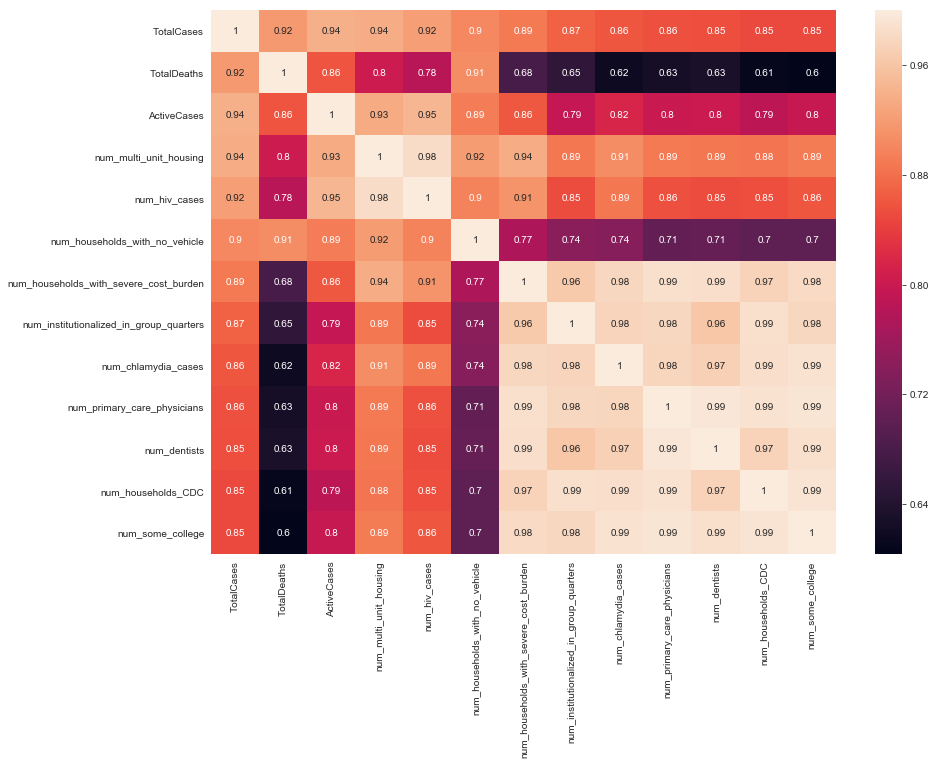

In [141]:
sns.heatmap(final_df_total.corr(),annot = True)

### Train Test Split


#### I Removed New York since it was an outlier and seemed to affect results after training and running model

In [405]:
cordemo_train,cordemo_test = shuffled_split_dfs(final_df_total[final_df_total['State'] != 'New York'],test_size = 0.3)

In [406]:
cordemo_train.head()

,State,TotalCases,TotalDeaths,ActiveCases,num_multi_unit_housing,num_hiv_cases,num_households_with_no_vehicle,num_households_with_severe_cost_burden,num_institutionalized_in_group_quarters,num_chlamydia_cases,num_primary_care_physicians,num_dentists,num_households_CDC,num_some_college
0,North Dakota,3458,78,261,0.011354,0.001468,0.001990,0.002750,0.015245,0.006417,0.006010,0.003175,0.006214,0.006821
1,Delaware,11091,507,3919,0.006395,0.013696,0.003620,0.009760,0.013621,0.016291,0.009628,0.001815,0.009623,0.006769
2,Wyoming,1392,20,318,0.000000,0.001254,0.000000,0.000000,0.000000,0.001309,0.000000,0.000000,0.000000,0.000511
3,Virginia,61247,1724,51555,0.104259,0.077186,0.049207,0.148853,0.284419,0.186731,0.194733,0.164973,0.227592,0.211578
4,Massachusetts,108443,8041,8998,0.098825,0.088426,0.081609,0.152251,0.294805,0.106709,0.216220,0.203109,0.185360,0.171189


In [407]:
cordemo_test.head()

,State,TotalCases,TotalDeaths,ActiveCases,num_multi_unit_housing,num_hiv_cases,num_households_with_no_vehicle,num_households_with_severe_cost_burden,num_institutionalized_in_group_quarters,num_chlamydia_cases,num_primary_care_physicians,num_dentists,num_households_CDC,num_some_college
35,Utah,20628,167,8803,0.022464,0.011975,0.008201,0.029878,0.039280,0.038087,0.045331,0.053227,0.054957,0.071321
36,Louisiana,54804,3197,11815,0.031014,0.088533,0.035971,0.084345,0.142590,0.151456,0.088465,0.065778,0.119584,0.085614
37,Michigan,69679,6153,12427,0.091556,0.067404,0.078617,0.186745,0.268108,0.224587,0.239321,0.213089,0.288815,0.217320
38,Mississippi,25531,1035,7254,0.010279,0.038464,0.017389,0.045558,0.099927,0.088929,0.038352,0.030787,0.069300,0.050023
39,Maryland,66450,3157,58358,0.095679,0.132272,0.050335,0.114023,0.157280,0.145478,0.158740,0.129620,0.155043,0.142194


In [461]:
coeffs_tot_cases = stoch_grad_desc(cordemo_train,output_col = 'TotalCases',cols_to_ignore=['State','TotalDeaths','ActiveCases'],alpha= 0.02, epoch = 35)

Program took 0.0 hr(s), 0.0 min(s), 0.5630030632019043 sec(s) to run


In [462]:
pred_df_cases = make_predictions(cordemo_test,coeffs_tot_cases,'TotalCases',['State','TotalDeaths','ActiveCases'])

In [463]:
pred_df_cases[['State','TotalCases','Prediction']].sort_values('TotalCases',ascending = False)

,State,TotalCases,Prediction
41,Arizona,70051,44425.829325
37,Michigan,69679,62855.295327
39,Maryland,66450,44635.803847
42,North Carolina,60621,62863.171467
36,Louisiana,54804,34270.719841
45,Ohio,49907,73345.790979
46,Washington,32408,48836.004220
38,Mississippi,25531,23333.747734
35,Utah,20628,20135.114179
48,Arkansas,19310,22643.711084


In [464]:
check_accuracy(pred_df_cases)

{'MAE': 11294.520362113743,
 'ME': -962.9883956716891,
 'MSE': 193748650.111441,
 'RMSE': 13919.362453483312,
 'r_sqd': 0.6894906302210353}

In [163]:
cordemo_test.describe()['TotalCases']

count        16.000000
mean      33771.375000
std       36445.760743
min         852.000000
25%        6859.000000
50%       23957.000000
75%       48355.500000
max      142130.000000
Name: TotalCases, dtype: float64

In [465]:
adj_r_sqd_cases = 1 - ((1 - .689) * (16 - 1) / (16 - 10 - 1))

In [466]:
print("Adjusted R^2 for total cases is : %s" % adj_r_sqd_cases)

Adjusted R^2 for total cases is : 0.06699999999999984


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

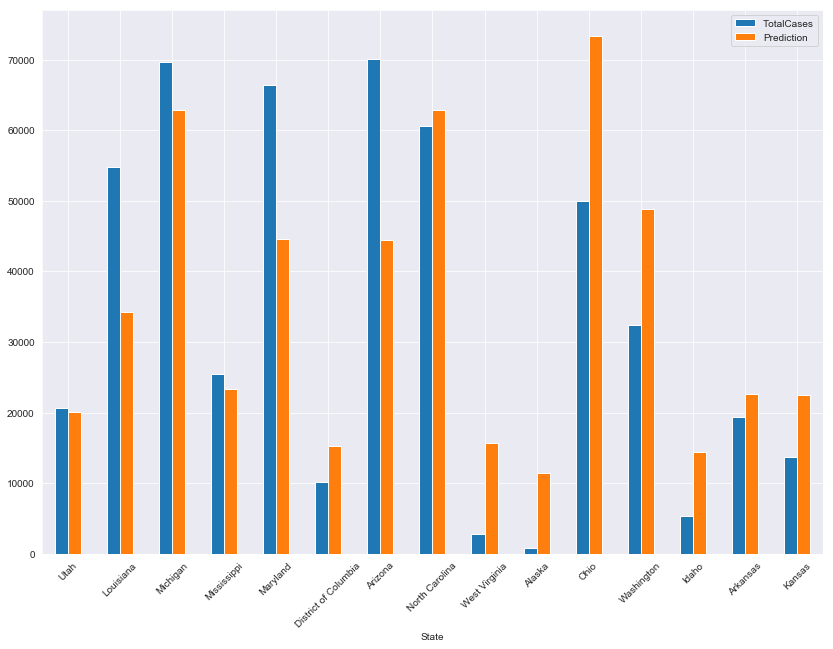

In [467]:
pred_df_cases.plot(kind = 'bar',x = 'State',y = ['TotalCases','Prediction'])
plt.xticks(rotation = 45)

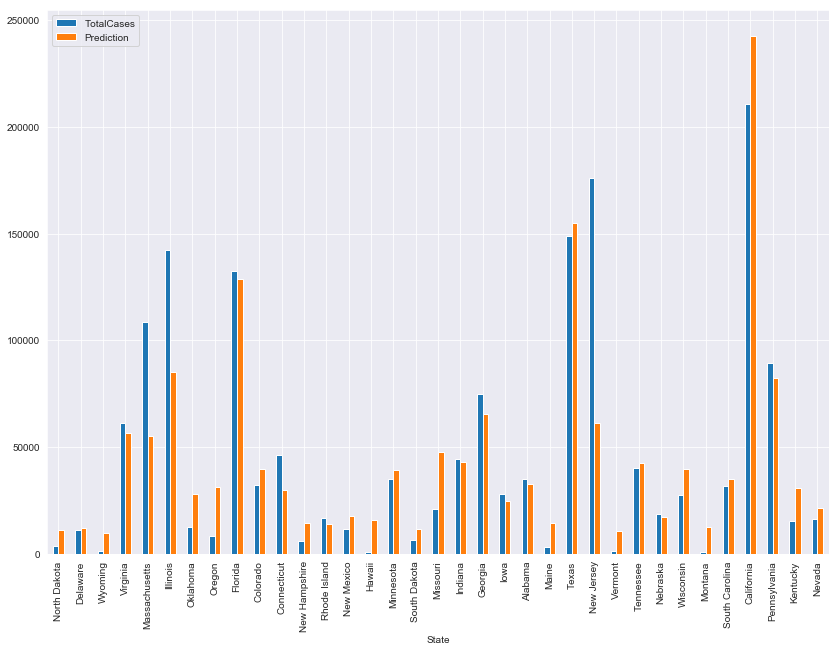

In [468]:
make_predictions(cordemo_train,coeff_list = coeffs_tot_cases,output_col = 'TotalCases',cols_to_ignore=['State','TotalDeaths','ActiveCases']).plot(kind = 'bar',x = 'State',y = ['TotalCases','Prediction'])

# Testing on Unlabeled Data

In [168]:
make_predictions(cordemo_test.drop('TotalCases',axis = 1).merge(pd.DataFrame(np.matrix([list(cordemo_test['State'].values)] + [list(np.zeros(16))]).transpose(),columns=['State','TotalCases'])),output_col = 'TotalCases',coeff_list=coeffs_tot_cases,cols_to_ignore=['State','TotalDeaths','ActiveCases'])[['State','TotalCases','Prediction']].sort_values('Prediction',ascending = False)

,State,TotalCases,Prediction
2,Illinois,0.0,85752.829854
3,Maryland,0.0,51870.524040
12,North Carolina,0.0,42825.885494
5,Indiana,0.0,40970.614950
4,Wisconsin,0.0,38881.686269
0,Colorado,0.0,38156.160648
9,Connecticut,0.0,36591.064838
7,Oregon,0.0,32866.782574
14,Louisiana,0.0,29586.887756
1,West Virginia,0.0,20630.417923


### Running Linear Model for Total Deaths

In [150]:
coeffs_percap_cases = stoch_grad_desc(cordemo_train,output_col = 'TotalDeaths',cols_to_ignore = ['State','TotalCases','ActiveCases'],alpha = 0.011,epoch = 2000)

Program took 0.0 hr(s), 0.0 min(s), 26.7969388961792 sec(s) to run


In [151]:
coeffs_tot_deaths

[702.0104572360902,
 685.1519832000055,
 1245.9547057964003,
 31595.59864745689,
 2180.8219197737953,
 7870.537219387839,
 -20765.049680937882,
 5941.1198763967805,
 8516.33144440983,
 -758.9751532484047,
 -4796.27791443121]

In [152]:
pred_df_deaths = make_predictions(dataset = cordemo_test,coeff_list = coeffs_tot_deaths,output_col = 'TotalDeaths',cols_to_ignore=['State','TotalCases','ActiveCases'])

In [153]:
pred_df_deaths[['State','TotalDeaths','Prediction']].sort_values('TotalDeaths',ascending = False)

,State,TotalDeaths,Prediction
37,Illinois,7074,4101.598242
44,Connecticut,4311,2257.991612
49,Louisiana,3197,715.679838
38,Maryland,3157,2235.740820
40,Indiana,2616,1832.388884
35,Colorado,1674,1574.528806
47,North Carolina,1353,1031.370455
39,Wisconsin,777,2105.551356
48,Delaware,507,660.931000
45,Nebraska,267,1048.151541


In [154]:
check_accuracy(df = pred_df_deaths)

{'MAE': 1179.8712077137918,
 'ME': 24.21646017056935,
 'MSE': 2000485.540575428,
 'RMSE': 1414.3855699827498,
 'r_sqd': 0.4713478919742017}

In [155]:
adj_r_sqd_deaths = 1 - ((1 - .4713) * (16 - 1) / (16 - 10 - 1))

In [156]:
print("Adjusted R^2 for total deaths is : %s" % adj_r_sqd_deaths)

Adjusted R^2 for total deaths is : -0.5860999999999998


In [157]:
cordemo_test.describe()['TotalDeaths']

count      16.000000
mean     1596.187500
std      2009.079332
min        18.000000
25%       151.250000
50%       642.000000
75%      2751.250000
max      7074.000000
Name: TotalDeaths, dtype: float64

In [158]:
cordemo_test[['State','TotalDeaths']].sort_values('TotalDeaths',ascending = False)

,State,TotalDeaths
37,Illinois,7074
44,Connecticut,4311
49,Louisiana,3197
38,Maryland,3157
40,Indiana,2616
35,Colorado,1674
47,North Carolina,1353
39,Wisconsin,777
48,Delaware,507
45,Nebraska,267


# Linear Regression for Per Capita Cases and Per Capita Deaths

## Feature Selection for Per Capita Cases

### Now I am going to select 10 features since there should be at least 3 data points for every feature

In [169]:
features_percap_cases = list(np.abs(cordemo_norm.drop(['State','TotalDeaths','TotalCases','ActiveCases','Deaths Per 1M Pop','TotalTests','Tests Per 1M Pop'],
                                                 axis = 1).corr()['Tot Cases Per 1M Pop']).sort_values(ascending = False).index[1:11])

In [170]:
features_percap_cases

['suicide_rate_age_adjusted',
 'income_ratio',
 'segregation_index_2',
 'percent_no_vehicle',
 'percent_female',
 'percentile_rank_no_vehicle',
 'percent_rural',
 'percent_severe_housing_cost_burden',
 'severe_housing_cost_burden',
 'eightieth_percentile_income']

In [171]:
final_df_percap_cases = cordemo_norm[['State','Tot Cases Per 1M Pop','Deaths Per 1M Pop'] + features_percap_cases]

In [172]:
final_df_percap_cases

,State,Tot Cases Per 1M Pop,Deaths Per 1M Pop,suicide_rate_age_adjusted,income_ratio,segregation_index_2,percent_no_vehicle,percent_female,percentile_rank_no_vehicle,percent_rural,percent_severe_housing_cost_burden,severe_housing_cost_burden,eightieth_percentile_income
0,New York,21385,1617,0.065901,0.638366,0.667882,0.986008,0.809092,0.901850,0.135473,1.000000,1.000000,0.616325
1,California,5336,149,0.226140,0.362063,0.247482,0.116717,0.517985,0.525331,0.081396,0.898468,0.915870,0.626381
2,New Jersey,19820,1699,0.093955,0.398146,0.468627,0.241852,0.699664,0.700101,0.085259,0.784642,0.824307,0.781036
3,Texas,5133,83,0.340983,0.272407,0.228245,0.060817,0.520943,0.349637,0.243744,0.319060,0.324674,0.334142
4,Illinois,11216,558,0.234725,0.336224,0.552287,0.216569,0.639378,0.607518,0.185426,0.439526,0.488869,0.434257
5,Florida,6171,158,0.438710,0.266675,0.437631,0.101880,0.693270,0.528720,0.141915,0.679129,0.721965,0.199284
6,Massachusetts,15733,1167,0.154272,0.475557,0.556743,0.269759,0.766907,0.841217,0.129604,0.538957,0.560011,0.740758
7,Pennsylvania,6990,520,0.439118,0.274130,0.600328,0.230559,0.669210,0.706090,0.345873,0.327241,0.361385,0.318268
8,Georgia,7062,261,0.365950,0.283365,0.364507,0.094531,0.747367,0.418736,0.396881,0.401620,0.467852,0.262231
9,Arizona,9624,217,0.651311,0.236159,0.307200,0.093634,0.517627,0.528806,0.162800,0.382672,0.432537,0.237933


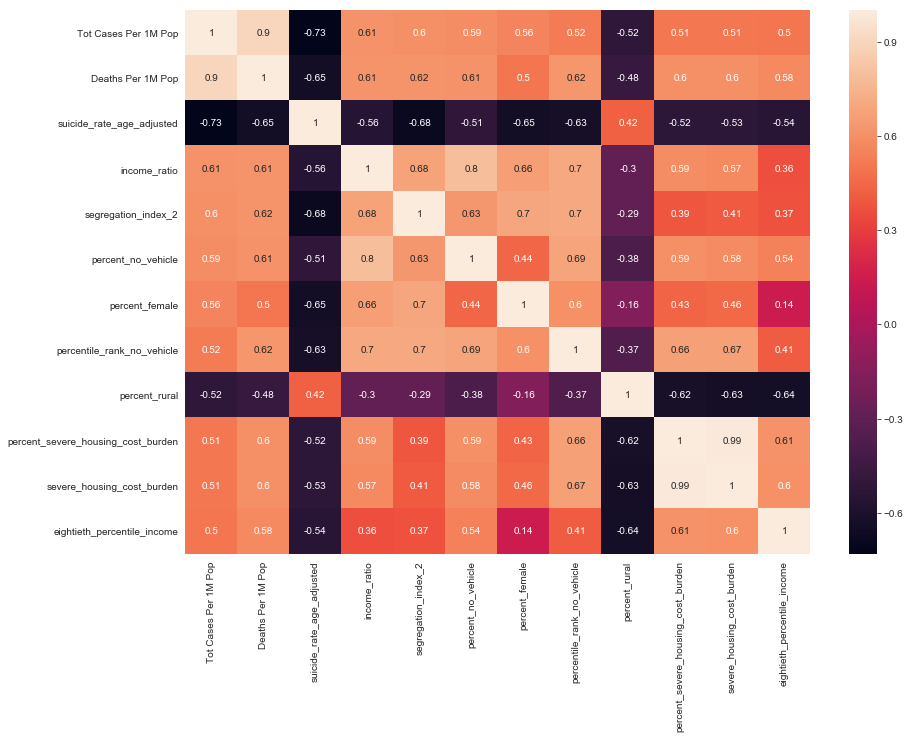

In [173]:
sns.heatmap(final_df_percap_cases.corr(),annot = True)

### Train Test Split


In [263]:
cordemo_train_percap_cases,cordemo_test_percap_cases = shuffled_split_dfs(final_df_percap_cases,test_size = 0.3)

In [264]:
cordemo_train.head()

,State,TotalCases,TotalDeaths,ActiveCases,num_multi_unit_housing,num_hiv_cases,num_households_with_no_vehicle,num_households_with_severe_cost_burden,num_institutionalized_in_group_quarters,num_chlamydia_cases,num_primary_care_physicians,num_dentists,num_households_CDC,num_some_college
0,Maryland,66450,3157,58358,0.095679,0.132272,0.050335,0.114023,0.157280,0.145478,0.158740,0.129620,0.155043,0.142194
1,South Carolina,31939,711,17772,0.039931,0.072199,0.030099,0.085372,0.153104,0.139886,0.095670,0.073217,0.128140,0.096261
2,California,210849,5904,147342,0.570072,0.550805,0.252133,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,West Virginia,2782,93,633,0.005551,0.006686,0.014854,0.018655,0.043110,0.010520,0.032892,0.018327,0.040731,0.020221
4,Hawaii,872,18,140,0.027442,0.010044,0.007752,0.023451,0.037101,0.022985,0.027690,0.025615,0.017889,0.023190


In [265]:
cordemo_test.head()

,State,TotalCases,TotalDeaths,ActiveCases,num_multi_unit_housing,num_hiv_cases,num_households_with_no_vehicle,num_households_with_severe_cost_burden,num_institutionalized_in_group_quarters,num_chlamydia_cases,num_primary_care_physicians,num_dentists,num_households_CDC,num_some_college
35,Nevada,16339,500,5044,0.038713,0.040265,0.019121,0.054842,0.028884,0.062722,0.042100,0.044668,0.063886,0.052983
36,Kentucky,15167,554,10883,0.026513,0.022459,0.032609,0.069607,0.145535,0.080497,0.081777,0.075788,0.118536,0.084225
37,Arkansas,19310,259,5781,0.016831,0.024074,0.016863,0.041859,0.085976,0.071277,0.051922,0.030484,0.072692,0.048455
38,Tennessee,40172,584,13429,0.050945,0.071532,0.038934,0.112532,0.174148,0.153181,0.142779,0.098530,0.182444,0.134173
39,Oklahoma,12642,384,3103,0.026281,0.025858,0.019461,0.055126,0.119417,0.091699,0.065880,0.061060,0.098130,0.072104


### Running Linear Model for Per Capita Cases

In [395]:
coeffs_percap_cases = stoch_grad_desc(cordemo_train_percap_cases,output_col = 'Tot Cases Per 1M Pop',cols_to_ignore = ['State','Deaths Per 1M Pop'],alpha = 0.001,epoch = 230)

Program took 0.0 hr(s), 0.0 min(s), 3.4719130992889404 sec(s) to run


In [396]:
coeffs_percap_cases

[2293.923092384098,
 -2353.0758023086037,
 1921.5608762539107,
 1955.4036503395312,
 2048.6333143727516,
 2443.6125606015576,
 1743.2810632277474,
 -980.3772238126942,
 2050.460483111188,
 2049.961343706457,
 2687.652952505391]

In [397]:
pred_df_percap_cases = make_predictions(dataset = cordemo_test_percap_cases,coeff_list = coeffs_percap_cases,output_col='Tot Cases Per 1M Pop',cols_to_ignore = ['State','Deaths Per 1M Pop'])

In [398]:
check_accuracy(df = pred_df_percap_cases)

{'MAE': 2164.0359447802307,
 'ME': 301.99301775623815,
 'MSE': 6552764.077335602,
 'RMSE': 2559.83692397301,
 'r_sqd': 0.5042677527816595}

In [399]:
pred_df_percap_cases[['State','Tot Cases Per 1M Pop','Prediction']].sort_values('Tot Cases Per 1M Pop',ascending = False)

,State,Tot Cases Per 1M Pop,Prediction
48,Connecticut,12960,11496.599092
35,Louisiana,11789,7980.714987
38,Maryland,10991,9875.598671
40,Arizona,9624,6345.608765
47,Mississippi,8579,6365.386577
36,Utah,6434,3386.009553
42,Arkansas,6399,4619.025319
45,Minnesota,6212,6156.247820
37,California,5336,10685.586570
50,Texas,5133,6447.298153


In [400]:
adj_r_sqd_percap_cases = 1 - ((1 - .504) * (16 - 1) / (16 - 10 - 1))

In [401]:
print("Adjusted R^2 for per capita cases is : %s" % adj_r_sqd_percap_cases)

Adjusted R^2 for per capita cases is : -0.488


In [274]:
cordemo_test_percap_cases.describe()['Tot Cases Per 1M Pop']

count       16.000000
mean      6186.375000
std       3754.940352
min        797.000000
25%       4004.750000
50%       5774.000000
75%       8840.250000
max      12960.000000
Name: Tot Cases Per 1M Pop, dtype: float64

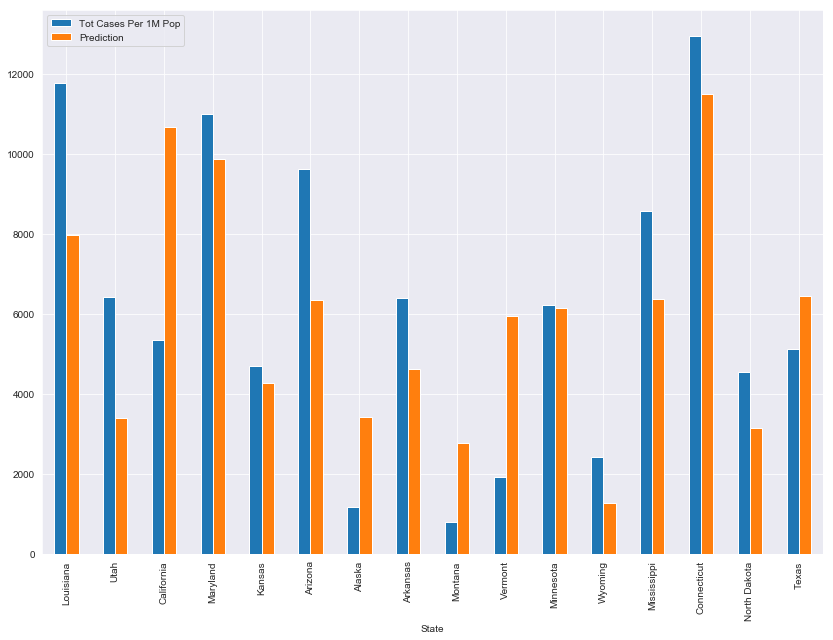

In [402]:
pred_df_percap_cases[['State','Tot Cases Per 1M Pop','Prediction']].plot(kind = 'bar',x = 'State',y = ['Tot Cases Per 1M Pop','Prediction'])

## Feature Selection for Per Capita Cases

### Now I am going to select 10 features since there should be at least 3 data points for every feature

In [277]:
features_percap_deaths = list(np.abs(cordemo_norm.drop(['State','TotalDeaths','TotalCases','ActiveCases','Tot Cases Per 1M Pop','TotalTests','Tests Per 1M Pop'],
                                                 axis = 1).corr()['Deaths Per 1M Pop']).sort_values(ascending = False).index[1:11])

In [278]:
features_percap_deaths

['suicide_rate_age_adjusted',
 'percentile_rank_no_vehicle',
 'segregation_index_2',
 'income_ratio',
 'percent_no_vehicle',
 'percent_severe_housing_cost_burden',
 'severe_housing_cost_burden',
 'eightieth_percentile_income',
 'segregation_index',
 'per_capita_income']

In [282]:
final_df_percap_deaths = cordemo_norm[['State','Tot Cases Per 1M Pop','Deaths Per 1M Pop'] + features_percap_deaths]

In [283]:
final_df_percap_deaths

,State,Tot Cases Per 1M Pop,Deaths Per 1M Pop,suicide_rate_age_adjusted,percentile_rank_no_vehicle,segregation_index_2,income_ratio,percent_no_vehicle,percent_severe_housing_cost_burden,severe_housing_cost_burden,eightieth_percentile_income,segregation_index,per_capita_income
0,New York,21385,1617,0.065901,0.901850,0.667882,0.638366,0.986008,1.000000,1.000000,0.616325,0.949995,0.461760
1,California,5336,149,0.226140,0.525331,0.247482,0.362063,0.116717,0.898468,0.915870,0.626381,0.523724,0.361484
2,New Jersey,19820,1699,0.093955,0.700101,0.468627,0.398146,0.241852,0.784642,0.824307,0.781036,0.647369,0.585586
3,Texas,5133,83,0.340983,0.349637,0.228245,0.272407,0.060817,0.319060,0.324674,0.334142,0.408965,0.227716
4,Illinois,11216,558,0.234725,0.607518,0.552287,0.336224,0.216569,0.439526,0.488869,0.434257,0.773110,0.363115
5,Florida,6171,158,0.438710,0.528720,0.437631,0.266675,0.101880,0.679129,0.721965,0.199284,0.554442,0.219204
6,Massachusetts,15733,1167,0.154272,0.841217,0.556743,0.475557,0.269759,0.538957,0.560011,0.740758,0.709334,0.605181
7,Pennsylvania,6990,520,0.439118,0.706090,0.600328,0.274130,0.230559,0.327241,0.361385,0.318268,0.711273,0.312800
8,Georgia,7062,261,0.365950,0.418736,0.364507,0.283365,0.094531,0.401620,0.467852,0.262231,0.334166,0.185299
9,Arizona,9624,217,0.651311,0.528806,0.307200,0.236159,0.093634,0.382672,0.432537,0.237933,0.400199,0.185618


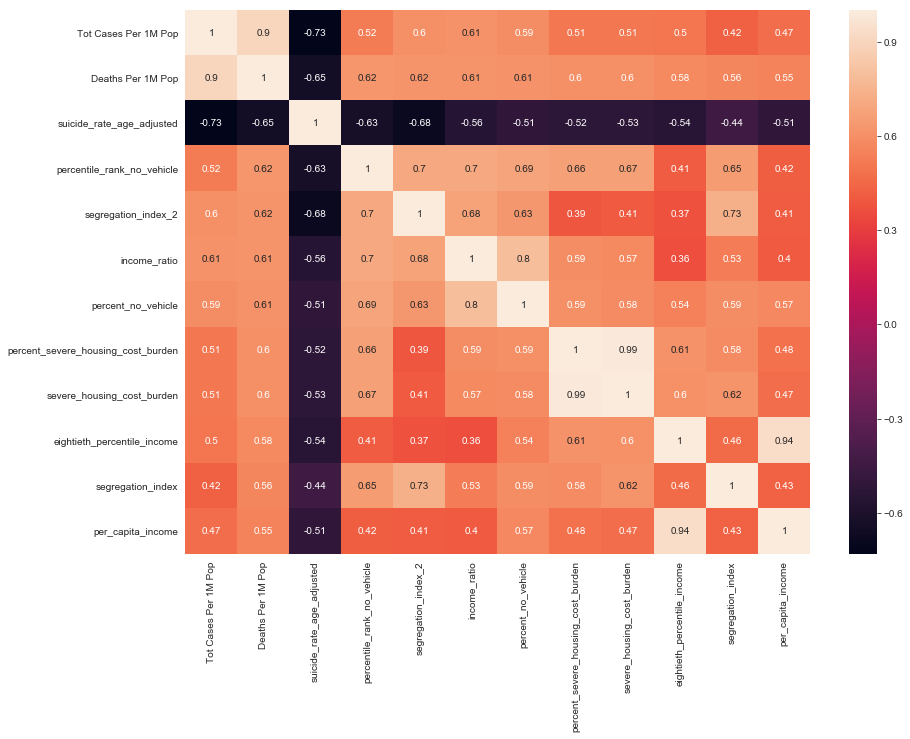

In [284]:
sns.heatmap(final_df_percap_deaths.corr(),annot = True)

### Train Test Split


In [285]:
cordemo_train_percap_deaths,cordemo_test_percap_deaths = shuffled_split_dfs(final_df_percap_deaths,test_size = 0.3)

In [286]:
cordemo_train_percap_deaths.head(2)

,State,Tot Cases Per 1M Pop,Deaths Per 1M Pop,suicide_rate_age_adjusted,percentile_rank_no_vehicle,segregation_index_2,income_ratio,percent_no_vehicle,percent_severe_housing_cost_burden,severe_housing_cost_burden,eightieth_percentile_income,segregation_index,per_capita_income
0,Michigan,6977,616,0.410147,0.592655,0.634874,0.251864,0.134094,0.285957,0.372131,0.219756,0.744426,0.217397
1,Mississippi,8579,348,0.352712,0.459918,0.374043,0.388318,0.097129,0.306201,0.335069,0.000000,0.254156,0.000000


In [287]:
cordemo_test_percap_deaths.head(2)

,State,Tot Cases Per 1M Pop,Deaths Per 1M Pop,suicide_rate_age_adjusted,percentile_rank_no_vehicle,segregation_index_2,income_ratio,percent_no_vehicle,percent_severe_housing_cost_burden,severe_housing_cost_burden,eightieth_percentile_income,segregation_index,per_capita_income
35,West Virginia,1552,52,0.674959,0.706013,0.412352,0.307312,0.155781,0.035081,0.053276,0.014526,0.364258,0.086664
36,Ohio,4270,242,0.426285,0.632943,0.616215,0.265699,0.142695,0.213489,0.270351,0.204179,0.665800,0.226655


### Running Linear Model on Per Capita Deaths

In [363]:
coeffs_percap_deaths = stoch_grad_desc(cordemo_train_percap_deaths,output_col = 'Deaths Per 1M Pop',cols_to_ignore=['State','Tot Cases Per 1M Pop'],alpha= 0.002, epoch = 220)

Program took 0.0 hr(s), 0.0 min(s), 2.692797899246216 sec(s) to run


In [364]:
pred_df_percap_deaths = make_predictions(cordemo_test_percap_deaths,coeffs_percap_deaths,output_col = 'Deaths Per 1M Pop',cols_to_ignore= ['State','Tot Cases Per 1M Pop'])

In [365]:
check_accuracy(pred_df_percap_deaths)

{'MAE': 168.33215168502758,
 'ME': -11.392002318220246,
 'MSE': 52464.84793116664,
 'RMSE': 229.05424669969915,
 'r_sqd': 0.6253352080692522}

In [366]:
pred_df_percap_deaths[['State','Deaths Per 1M Pop','Prediction']].sort_values('Deaths Per 1M Pop',ascending = False)

,State,Deaths Per 1M Pop,Prediction
45,New York,1617,955.496563
48,Louisiana,688,383.697716
50,Delaware,521,361.364739
44,Pennsylvania,520,463.322914
47,Colorado,291,232.513131
46,New Hampshire,270,350.615202
37,Georgia,261,319.471890
36,Ohio,242,382.372066
42,Iowa,223,208.083741
43,Virginia,202,313.351572


In [367]:
cordemo_test_percap_deaths.describe()['Deaths Per 1M Pop']

count      16.000000
mean      338.062500
std       386.480093
min        48.000000
25%       123.000000
50%       232.500000
75%       348.250000
max      1617.000000
Name: Deaths Per 1M Pop, dtype: float64

In [368]:
adj_r_sqd_percap_deaths = 1 - ((1 - .6253) * (16 - 1) / (16 - 10 - 1))

In [369]:
print("Adjusted R^2 for per capita deaths is : %s" % adj_r_sqd_percap_deaths)

Adjusted R^2 for per capita deaths is : -0.1241000000000001


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

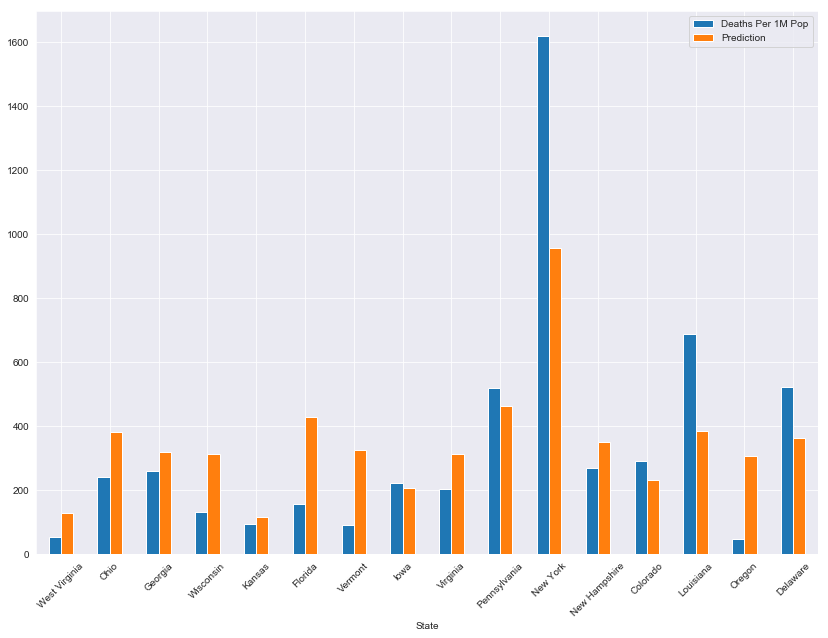

In [370]:
pred_df_percap_deaths.plot(kind = 'bar',x = 'State',y = ['Deaths Per 1M Pop','Prediction'])
plt.xticks(rotation = 45)